In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datathon2023/sample_submission.csv
/kaggle/input/datathon2023/test_x.csv
/kaggle/input/datathon2023/train.csv


## Dataset Description

### Dosya Açıklamaları

* train.csv - eğitim seti
* test_x.csv - test seti
* sample_submission.csv - örnek dosya yükleme formatı


### Veri içerisinde bulunan sütunların açıklamaları

İndex

Cinsiyet

Yaş Grubu

Medeni Durum

Eğitim Düzeyi

İstihdam Durumu

Yıllık Ortalama Gelir

Yaşadığı Şehir

En Çok İlgilendiği Ürün Grubu

Yıllık Ortalama Satın Alım Miktarı

Yıllık Ortalama Sipariş Verilen Ürün Adedi

Eğitime Devam Etme Durumu

Yıllık Ortalama Sepete Atılan Ürün Adedi

Öbek İsmi - Tahmin edilecek olan etiket

## 1.Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import missingno as msno
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
import plotly.express as px
import warnings   
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)

import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_validate
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,recall_score
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.model_selection import KFold


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2.Data Load

In [2]:
df_train=pd.read_csv("/kaggle/input/datathon2023/train.csv")
df_train

index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0         0    Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1         1    Erkek       >60         Evli           Lise Mezunu   
2         2    Erkek     18-30        Bekar           Lise Mezunu   
3         3    Erkek     51-60         Evli           Lise Mezunu   
4         4    Erkek     31-40         Evli       Ortaokul Mezunu   
...     ...      ...       ...          ...                   ...   
5455   5455    Kadın       >60        Bekar     Üniversite Mezunu   
5456   5456    Erkek     51-60         Evli         Doktora Ötesi   
5457   5457    Kadın     51-60         Evli        İlkokul Mezunu   
5458   5458    Kadın     18-30        Bekar     Yüksekokul Mezunu   
5459   5459    Erkek     18-30        Bekar     Yüksekokul Mezunu   

                     İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0     Düzenli ve Ücretli Bir İşi Var          748266.440879      Büyük Şehir   
1                Kendi İşinin Sahibi          246298.609605      Küçük Şehir   
2     Düzenli ve Ücretli Bir İşi Var          268582.732360      Küçük Şehir   
3                Kendi İşinin Sahibi          327721.837865           Kırsal   
4     İşsiz veya Düzenli Bir İşi Yok          397431.626948      Büyük Şehir   
...                              ...                    ...              ...   
5455                          Emekli          478054.247819  Köy veya Kasaba   
5456             Kendi İşinin Sahibi          481852.853651  Köy veya Kasaba   
5457  Düzenli ve Ücretli Bir İşi Var          309443.687351      Küçük Şehir   
5458  Düzenli ve Ücretli Bir İşi Var          266604.268016      Büyük Şehir   
5459  Düzenli ve Ücretli Bir İşi Var          276155.078333      Büyük Şehir   

         En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0     Elektronik ve Teknolojik Ürünler                        32010.900881   
1                     Spor Malzemeleri                         4145.729891   
2                                Giyim                         9924.379414   
3                                Giyim                         6417.780714   
4                                Giyim                         7886.663061   
...                                ...                                 ...   
5455                          Kozmetik                        43182.299801   
5456                     Ev ve Mobilya                        42107.996193   
5457                     Ev ve Mobilya                         4655.392445   
5458                     Ev ve Mobilya                         9016.165906   
5459                  Spor Malzemeleri                         9455.657480   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                      37.310644                   Etmiyor   
1                                      11.554851                   Etmiyor   
2                                      55.353236                    Ediyor   
3                                      15.417239                   Etmiyor   
4                                      14.689837                   Etmiyor   
...                                          ...                       ...   
5455                                   31.356284                   Etmiyor   
5456                                   26.288620                   Etmiyor   
5457                                    5.156906                   Etmiyor   
5458                                   39.205399                    Ediyor   
5459                                   50.554188                    Ediyor   

     Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
0       obek_4                                102.936904  
1       obek_5                                 82.176053  
2       obek_8                                141.661426  
3       obek_3                                 17.097397  
4       obek_3                                 

In [3]:
df_train.tail()

index Cinsiyet Yaş Grubu Medeni Durum      Eğitim Düzeyi  \
5455   5455    Kadın       >60        Bekar  Üniversite Mezunu   
5456   5456    Erkek     51-60         Evli      Doktora Ötesi   
5457   5457    Kadın     51-60         Evli     İlkokul Mezunu   
5458   5458    Kadın     18-30        Bekar  Yüksekokul Mezunu   
5459   5459    Erkek     18-30        Bekar  Yüksekokul Mezunu   

                     İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
5455                          Emekli          478054.247819  Köy veya Kasaba   
5456             Kendi İşinin Sahibi          481852.853651  Köy veya Kasaba   
5457  Düzenli ve Ücretli Bir İşi Var          309443.687351      Küçük Şehir   
5458  Düzenli ve Ücretli Bir İşi Var          266604.268016      Büyük Şehir   
5459  Düzenli ve Ücretli Bir İşi Var          276155.078333      Büyük Şehir   

     En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
5455                      Kozmetik                        43182.299801   
5456                 Ev ve Mobilya                        42107.996193   
5457                 Ev ve Mobilya                         4655.392445   
5458                 Ev ve Mobilya                         9016.165906   
5459              Spor Malzemeleri                         9455.657480   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
5455                                   31.356284                   Etmiyor   
5456                                   26.288620                   Etmiyor   
5457                                    5.156906                   Etmiyor   
5458                                   39.205399                    Ediyor   
5459                                   50.554188                    Ediyor   

     Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
5455    obek_6                                 51.600436  
5456    obek_6                                 49.190536  
5457    obek_1                                  9.537384  
5458    obek_8                                143.281718  
5459    obek_8                                127.329348

In [4]:
df_test=pd.read_csv("/kaggle/input/datathon2023/test_x.csv")
df_test

index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0         0    Erkek     51-60         Evli  Yüksek Lisans Mezunu   
1         1    Erkek     41-50        Bekar           Lise Mezunu   
2         2    Kadın       >60         Evli             Eğitimsiz   
3         3    Kadın     51-60         Evli         Doktora Ötesi   
4         4    Erkek     18-30         Evli  Yüksek Lisans Mezunu   
...     ...      ...       ...          ...                   ...   
2335   2335    Kadın     18-30        Bekar     Yüksekokul Mezunu   
2336   2336    Kadın     31-40         Evli           Lise Mezunu   
2337   2337    Erkek       >60         Evli  Yüksek Lisans Mezunu   
2338   2338    Erkek     18-30         Evli         Doktora Ötesi   
2339   2339    Erkek     51-60         Evli     Üniversite Mezunu   

                     İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0     Düzenli ve Ücretli Bir İşi Var          365331.930346  Köy veya Kasaba   
1     İşsiz veya Düzenli Bir İşi Yok          414899.236174      Büyük Şehir   
2     İşsiz veya Düzenli Bir İşi Yok          152825.872271      Küçük Şehir   
3     Düzenli ve Ücretli Bir İşi Var          489052.908472  Köy veya Kasaba   
4                Kendi İşinin Sahibi          323635.711534      Küçük Şehir   
...                              ...                    ...              ...   
2335             Kendi İşinin Sahibi          259190.078834      Küçük Şehir   
2336  İşsiz veya Düzenli Bir İşi Yok          194580.563177           Kırsal   
2337  Düzenli ve Ücretli Bir İşi Var          357730.521969      Büyük Şehir   
2338  Düzenli ve Ücretli Bir İşi Var          213179.637202      Küçük Şehir   
2339  Düzenli ve Ücretli Bir İşi Var          519013.573683  Köy veya Kasaba   

         En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0                                Giyim                         5566.587664   
1                     Spor Malzemeleri                         6756.766203   
2                                Giyim                         4493.915682   
3                             Kozmetik                        42670.646595   
4                                Giyim                         5959.266948   
...                                ...                                 ...   
2335                     Ev ve Mobilya                         9559.156534   
2336                     Ev ve Mobilya                         4070.232154   
2337                     Ev ve Mobilya                        22589.204381   
2338                  Spor Malzemeleri                         4205.390562   
2339  Elektronik ve Teknolojik Ürünler                        42675.353591   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                      15.442635                   Etmiyor   
1                                      14.957246                   Etmiyor   
2                                      10.907930                   Etmiyor   
3                                      32.333021                   Etmiyor   
4                                       4.519968                   Etmiyor   
...                                          ...                       ...   
2335                                   41.883661                    Ediyor   
2336                                   20.082996                   Etmiyor   
2337                                   18.922305                   Etmiyor   
2338                                   10.758108                   Etmiyor   
2339                                   30.826534                    Ediyor   

      Yıllık Ortalama Sepete Atılan Ürün Adedi  
0                                    19.646460  
1                                    19.675863  
2                                    46.904518  
3                                    48.083609  
4                                    12.752491  
...                                        ...  

## 3.EDA

In [5]:
df_train.shape

(5460, 14)

In [6]:
df_train.columns

Index(['index', 'Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi',
       'İstihdam Durumu', 'Yıllık Ortalama Gelir', 'Yaşadığı Şehir',
       'En Çok İlgilendiği Ürün Grubu', 'Yıllık Ortalama Satın Alım Miktarı',
       'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
       'Eğitime Devam Etme Durumu', 'Öbek İsmi',
       'Yıllık Ortalama Sepete Atılan Ürün Adedi'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       5460 non-null   int64  
 1   Cinsiyet                                    5460 non-null   object 
 2   Yaş Grubu                                   5460 non-null   object 
 3   Medeni Durum                                5460 non-null   object 
 4   Eğitim Düzeyi                               5460 non-null   object 
 5   İstihdam Durumu                             5460 non-null   object 
 6   Yıllık Ortalama Gelir                       5460 non-null   float64
 7   Yaşadığı Şehir                              5460 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               5460 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          5460 non-null   float64
 10  Yıllık Ortal

In [8]:
# verisetimizde eksik değer yok,5 sayısal ve 5 kategorik değişken var

In [9]:
df_train.describe([0.1,0.25,0.35,0.5,0.65,0.75,0.9]).T

count           mean  \
index                                       5460.0    2729.500000   
Yıllık Ortalama Gelir                       5460.0  363571.133428   
Yıllık Ortalama Satın Alım Miktarı          5460.0   16616.612217   
Yıllık Ortalama Sipariş Verilen Ürün Adedi  5460.0      24.040884   
Yıllık Ortalama Sepete Atılan Ürün Adedi    5460.0      73.445693   

                                                      std           min  \
index                                         1576.310566      0.000000   
Yıllık Ortalama Gelir                       219714.442407  43922.988693   
Yıllık Ortalama Satın Alım Miktarı           14099.171704   2859.254000   
Yıllık Ortalama Sipariş Verilen Ürün Adedi      14.945655      0.000000   
Yıllık Ortalama Sepete Atılan Ürün Adedi        47.214184      3.977559   

                                                      10%            25%  \
index                                          545.900000    1364.750000   
Yıllık Ortalama Gelir                       170575.367076  215693.439307   
Yıllık Ortalama Satın Alım Miktarı            3982.074933    4931.859057   
Yıllık Ortalama Sipariş Verilen Ürün Adedi       7.169551      11.550502   
Yıllık Ortalama Sepete Atılan Ürün Adedi        11.471611      25.009168   

                                                      35%            50%  \
index                                         1910.650000    2729.500000   
Yıllık Ortalama Gelir                       238153.967125  286925.436073   
Yıllık Ortalama Satın Alım Miktarı            6039.458887    8426.818967   
Yıllık Ortalama Sipariş Verilen Ürün Adedi      15.252897      20.095924   
Yıllık Ortalama Sepete Atılan Ürün Adedi        48.052994      82.485579   

                                                      65%            75%  \
index                                         3548.350000    4094.250000   
Yıllık Ortalama Gelir                       356041.361458  468188.221798   
Yıllık Ortalama Satın Alım Miktarı           25454.454080   30579.244695   
Yıllık Ortalama Sipariş Verilen Ürün Adedi      29.211149      35.918161   
Yıllık Ortalama Sepete Atılan Ürün Adedi        97.944827     104.473291   

                                                      90%           max  
index                                         4913.100000  5.459000e+03  
Yıllık Ortalama Gelir                       759080.731932  1.192437e+06  
Yıllık Ortalama Satın Alım Miktarı           38756.728396  4.860559e+04  
Yıllık Ortalama Sipariş Verilen Ürün Adedi      46.698859  6.461620e+01  
Yıllık Ortalama Sepete Atılan Ürün Adedi       129.625888  2.423084e+02

In [10]:
df_train.nunique()

index                                         5460
Cinsiyet                                         2
Yaş Grubu                                        5
Medeni Durum                                     2
Eğitim Düzeyi                                    9
İstihdam Durumu                                  4
Yıllık Ortalama Gelir                         5460
Yaşadığı Şehir                                   4
En Çok İlgilendiği Ürün Grubu                    5
Yıllık Ortalama Satın Alım Miktarı            5460
Yıllık Ortalama Sipariş Verilen Ürün Adedi    5422
Eğitime Devam Etme Durumu                        2
Öbek İsmi                                        8
Yıllık Ortalama Sepete Atılan Ürün Adedi      5460
dtype: int64

In [84]:
df_train.describe(include=["O"]).T

count unique                             top  \
Cinsiyet                       5460      2                           Erkek   
Yaş Grubu                      5460      5                           18-30   
Medeni Durum                   5460      2                            Evli   
Eğitim Düzeyi                  5460      9                     Lise Mezunu   
İstihdam Durumu                5460      4  Düzenli ve Ücretli Bir İşi Var   
Yaşadığı Şehir                 5460      4                     Büyük Şehir   
En Çok İlgilendiği Ürün Grubu  5460      5                           Giyim   
Eğitime Devam Etme Durumu      5460      2                         Etmiyor   
Öbek İsmi                      5460      8                          obek_4   

                               freq  
Cinsiyet                       2964  
Yaş Grubu                      1841  
Medeni Durum                   2834  
Eğitim Düzeyi                  1388  
İstihdam Durumu                2768  
Yaşadığı Şehir                 1959  
En Çok İlgilendiği Ürün Grubu  1487  
Eğitime Devam Etme Durumu      4554  
Öbek İsmi                       720

In [12]:
def check_df(dataframe, head=5):
    
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### nunique #####################")
    print(dataframe.nunique())
    print("##################### information #####################")
    print(dataframe.info())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [13]:
check_df(df_train)

##################### Shape #####################
(5460, 14)
##################### Types #####################
index                                           int64
Cinsiyet                                       object
Yaş Grubu                                      object
Medeni Durum                                   object
Eğitim Düzeyi                                  object
İstihdam Durumu                                object
Yıllık Ortalama Gelir                         float64
Yaşadığı Şehir                                 object
En Çok İlgilendiği Ürün Grubu                  object
Yıllık Ortalama Satın Alım Miktarı            float64
Yıllık Ortalama Sipariş Verilen Ürün Adedi    float64
Eğitime Devam Etme Durumu                      object
Öbek İsmi                                      object
Yıllık Ortalama Sepete Atılan Ürün Adedi      float64
dtype: object
##################### Head #####################
   index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0   

In [14]:
# otomotize etmiş olduk

In [15]:
check_df(df_test)

##################### Shape #####################
(2340, 13)
##################### Types #####################
index                                           int64
Cinsiyet                                       object
Yaş Grubu                                      object
Medeni Durum                                   object
Eğitim Düzeyi                                  object
İstihdam Durumu                                object
Yıllık Ortalama Gelir                         float64
Yaşadığı Şehir                                 object
En Çok İlgilendiği Ürün Grubu                  object
Yıllık Ortalama Satın Alım Miktarı            float64
Yıllık Ortalama Sipariş Verilen Ürün Adedi    float64
Eğitime Devam Etme Durumu                      object
Yıllık Ortalama Sepete Atılan Ürün Adedi      float64
dtype: object
##################### Head #####################
   index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0      0    Erkek     51-60         Evli  Yüksek Lisans Me

In [85]:
# sayısal ve kategorik değerler için birer liste oluşturalım

In [11]:
num_list=[i for i in df_train.select_dtypes(include=["int64","float64"])]
cat_list=[i for i in df_train.select_dtypes(include=["object"])]


In [12]:
cat_list

['Cinsiyet',
 'Yaş Grubu',
 'Medeni Durum',
 'Eğitim Düzeyi',
 'İstihdam Durumu',
 'Yaşadığı Şehir',
 'En Çok İlgilendiği Ürün Grubu',
 'Eğitime Devam Etme Durumu',
 'Öbek İsmi']

In [14]:
num_list

['index',
 'Yıllık Ortalama Gelir',
 'Yıllık Ortalama Satın Alım Miktarı',
 'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
 'Yıllık Ortalama Sepete Atılan Ürün Adedi']

In [15]:
df_train[num_list]

index  Yıllık Ortalama Gelir  Yıllık Ortalama Satın Alım Miktarı  \
0         0          748266.440879                        32010.900881   
1         1          246298.609605                         4145.729891   
2         2          268582.732360                         9924.379414   
3         3          327721.837865                         6417.780714   
4         4          397431.626948                         7886.663061   
...     ...                    ...                                 ...   
5455   5455          478054.247819                        43182.299801   
5456   5456          481852.853651                        42107.996193   
5457   5457          309443.687351                         4655.392445   
5458   5458          266604.268016                         9016.165906   
5459   5459          276155.078333                         9455.657480   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
0                                      37.310644   
1                                      11.554851   
2                                      55.353236   
3                                      15.417239   
4                                      14.689837   
...                                          ...   
5455                                   31.356284   
5456                                   26.288620   
5457                                    5.156906   
5458                                   39.205399   
5459                                   50.554188   

      Yıllık Ortalama Sepete Atılan Ürün Adedi  
0                                   102.936904  
1                                    82.176053  
2                                   141.661426  
3                                    17.097397  
4                                    20.470459  
...                                        ...  
5455                                 51.600436  
5456                                 49.190536  
5457                                  9.537384  
5458                                143.281718  
5459                                127.329348  

[5460 rows x 5 columns]

In [16]:
df_train[cat_list]

Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0       Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1       Erkek       >60         Evli           Lise Mezunu   
2       Erkek     18-30        Bekar           Lise Mezunu   
3       Erkek     51-60         Evli           Lise Mezunu   
4       Erkek     31-40         Evli       Ortaokul Mezunu   
...       ...       ...          ...                   ...   
5455    Kadın       >60        Bekar     Üniversite Mezunu   
5456    Erkek     51-60         Evli         Doktora Ötesi   
5457    Kadın     51-60         Evli        İlkokul Mezunu   
5458    Kadın     18-30        Bekar     Yüksekokul Mezunu   
5459    Erkek     18-30        Bekar     Yüksekokul Mezunu   

                     İstihdam Durumu   Yaşadığı Şehir  \
0     Düzenli ve Ücretli Bir İşi Var      Büyük Şehir   
1                Kendi İşinin Sahibi      Küçük Şehir   
2     Düzenli ve Ücretli Bir İşi Var      Küçük Şehir   
3                Kendi İşinin Sahibi           Kırsal   
4     İşsiz veya Düzenli Bir İşi Yok      Büyük Şehir   
...                              ...              ...   
5455                          Emekli  Köy veya Kasaba   
5456             Kendi İşinin Sahibi  Köy veya Kasaba   
5457  Düzenli ve Ücretli Bir İşi Var      Küçük Şehir   
5458  Düzenli ve Ücretli Bir İşi Var      Büyük Şehir   
5459  Düzenli ve Ücretli Bir İşi Var      Büyük Şehir   

         En Çok İlgilendiği Ürün Grubu Eğitime Devam Etme Durumu Öbek İsmi  
0     Elektronik ve Teknolojik Ürünler                   Etmiyor    obek_4  
1                     Spor Malzemeleri                   Etmiyor    obek_5  
2                                Giyim                    Ediyor    obek_8  
3                                Giyim                   Etmiyor    obek_3  
4                                Giyim                   Etmiyor    obek_3  
...                                ...                       ...       ...  
5455                          Kozmetik                   Etmiyor    obek_6  
5456                     Ev ve Mobilya                   Etmiyor    obek_6  
5457                     Ev ve Mobilya                   Etmiyor    obek_1  
5458                     Ev ve Mobilya                    Ediyor    obek_8  
5459                  Spor Malzemeleri                    Ediyor    obek_8  

[5460 rows x 9 columns]

## Öbek isimleri Analiz-Çıkarımlar:

In [17]:
df_train["Öbek İsmi"].value_counts()

obek_4    720
obek_8    717
obek_5    706
obek_3    695
obek_7    695
obek_1    692
obek_6    688
obek_2    547
Name: Öbek İsmi, dtype: int64

In [18]:
# Her bir öbek teki veri sayısına eriştik

In [19]:
# Öbek ismi- Cinsiyet

In [25]:
# Çapraz tablo oluşturarak kategorik değişkenler arasındaki  ilişkileri gözlemleyelim

In [22]:
cross_tab = pd.crosstab(df_train['Cinsiyet'], df_train['Öbek İsmi'])

print(cross_tab)

Öbek İsmi  obek_1  obek_2  obek_3  obek_4  obek_5  obek_6  obek_7  obek_8
Cinsiyet                                                                 
Erkek         326      19     626     368     576     344     348     357
Kadın         366     528      69     352     130     344     347     360


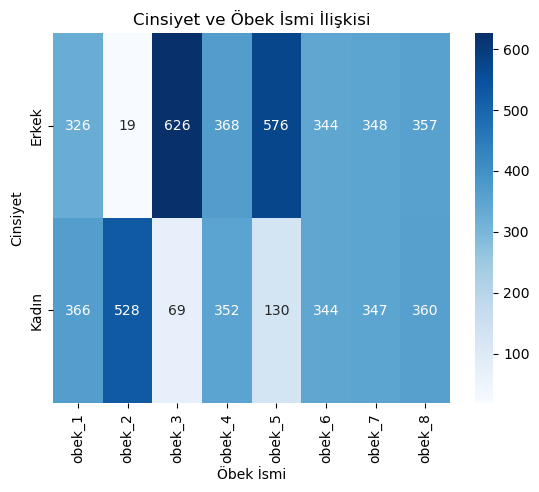

In [23]:
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Öbek İsmi')
plt.ylabel('Cinsiyet')
plt.title('Cinsiyet ve Öbek İsmi İlişkisi')
plt.show()

In [20]:
## Çıkarımlar;

# En çok Erkek öbek_3 te,en çok kadın öbek_2 te yer almaktadır
# Öbek_3 ve öbek_5 te erkeklere yönelik ürünler mevcuttur,öbek_2 de kadınlara yönelik ürünler mevcuttur


In [27]:
# Yaş grubu- Öbek ilişkisi

In [28]:
cross_tab = pd.crosstab(df_train['Yaş Grubu'], df_train['Öbek İsmi'])

print(cross_tab)

Öbek İsmi  obek_1  obek_2  obek_3  obek_4  obek_5  obek_6  obek_7  obek_8
Yaş Grubu                                                                
18-30         174     134     134     292     251      20     139     697
31-40         159     106     148     412     350      33     259      10
41-50         169     109     130       5      40      41     231       2
51-60         134      99     153       9      37     390      33       6
>60            56      99     130       2      28     204      33       2


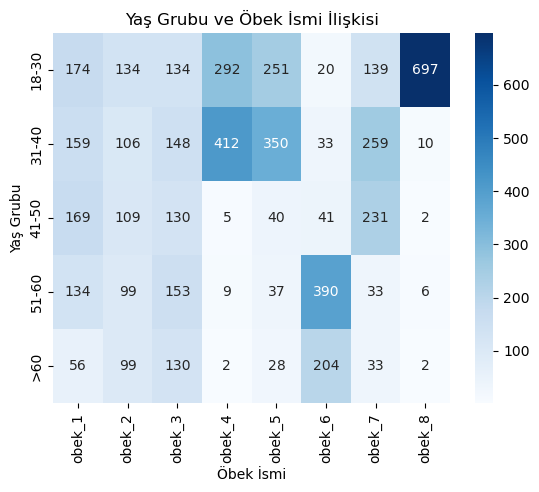

In [29]:
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Öbek İsmi')
plt.ylabel('Yaş Grubu')
plt.title('Yaş Grubu ve Öbek İsmi İlişkisi')
plt.show()

In [21]:
# Çıkarımlar

# 18-30 yaş arasındaki kişiler genelde öbek_8 grubunda yer almaktadır.Bu yaş grubundakiler En az öbek_6 grubunda yer aliyorlar
# Öbek_8 gençlerden oluşuyor (çoğunluk)
# 31-40 yaş grubundakiler en çok öbek_4 ,en az öbek_8 grubunda yer aliyor
# 41-50 yaş grubundakiler en çok öbek_7 de,en az öbek_8 grubunda yer aliyor
# 51-60 yaş grubundakiler en çok öbek_6 ,en az öbek_8 de yer aliyor
# 60 tan büyük kişiler en çok öbek_6 ,en az öbek_8 ve öbek_4 de yer aliyor

In [31]:
# Medeni Durum- Öbek ilişkisi


In [32]:
cross_tab = pd.crosstab(df_train['Medeni Durum'], df_train['Öbek İsmi'])

print(cross_tab)

Öbek İsmi     obek_1  obek_2  obek_3  obek_4  obek_5  obek_6  obek_7  obek_8
Medeni Durum                                                                
Bekar            288     123     133     556     397     228     265     636
Evli             404     424     562     164     309     460     430      81


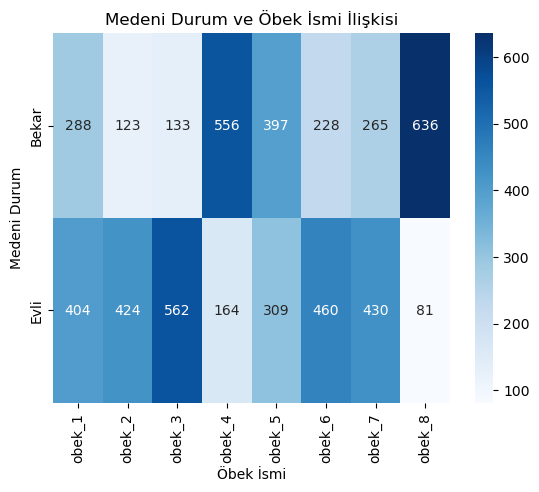

In [33]:
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Öbek İsmi')
plt.ylabel("Medeni Durum")
plt.title("Medeni Durum ve Öbek İsmi İlişkisi")
plt.show()

In [23]:
# Çıkarımlar
# Öbek_8 çoğunluk gençlerden  oluştuğu için çoğunluk bekar
# En çok evli öbek_3 te, en çok bekar öbek_8 de yer almaktadır

In [36]:
 # Eğitim Düzeyi- Öbek ilişkisi


In [37]:
cross_tab = pd.crosstab(df_train['Eğitim Düzeyi'], df_train['Öbek İsmi'])

print(cross_tab)

Öbek İsmi             obek_1  obek_2  obek_3  obek_4  obek_5  obek_6  obek_7  \
Eğitim Düzeyi                                                                  
Doktora Mezunu            26      21       7      72      34      33      66   
Doktora Ötesi             42      30       4      46      20      35      30   
Eğitimsiz                142      94      64      16       5      26      26   
Lise Mezunu              134     103     361      29     534      17      47   
Ortaokul Mezunu          131     108      59      22      21      18      37   
Yüksek Lisans Mezunu      29      21      21     125      24      64     201   
Yüksekokul Mezunu         35      22      81     106      20      67      36   
Üniversite Mezunu         30      27      38     280      29     414     218   
İlkokul Mezunu           123     121      60      24      19      14      34   

Öbek İsmi             obek_8  
Eğitim Düzeyi                 
Doktora Mezunu             4  
Doktora Ötesi             

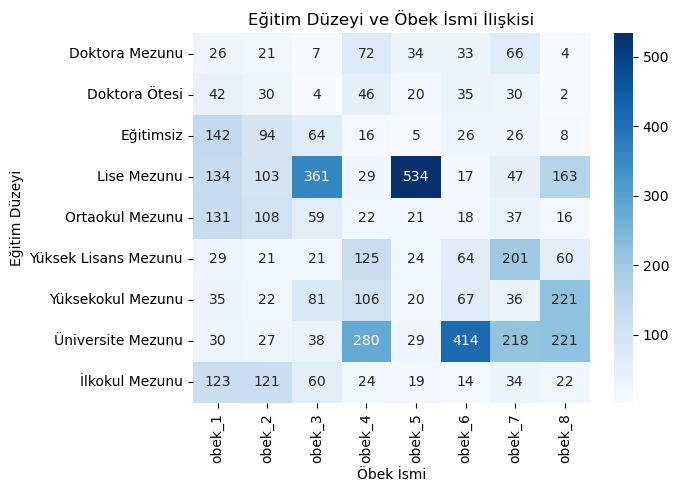

In [38]:
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Öbek İsmi')
plt.ylabel("Eğitim Düzeyi")
plt.title("Eğitim Düzeyi ve Öbek İsmi İlişkisi")
plt.show()

In [39]:
# Çıkarımlar

# en çok doktara mezunu öbek_4 grubunda ,en çok doktara sonrası öbek_4 te (öbek_4 en eğitimli grup denilebilir)
# en çok eğitimsiz öbek_1 grubunda ,en az öbek_5 te
# En çok lise mezunu öbek_5 te iken ,en az lise mezunu öbek_6 da
# en çok orta okul mezunu öbek_1 de ,en az öbek_8 de
# en çok yüksek lisans mezunu öbek_7 de ,en az yüksek lisans mezunu öbek_2 ve öbek_3 te
# En çok yüksek okul mezunu öbek_8 de ,en az yüksek okul mezunu öbek_5 te
# En çok Üniversite mezunu öbek_6 da,en az üniversite mezunu öbek_2 de
# En çok ilk okul mezunu öbek_1 de en az ilkokul mezunu öbek_6 da yer almaktadır

In [40]:
 # İstihdam Durumu- Öbek ilişkisi


In [41]:
cross_tab = pd.crosstab(df_train['İstihdam Durumu'], df_train['Öbek İsmi'])

print(cross_tab)

Öbek İsmi                       obek_1  obek_2  obek_3  obek_4  obek_5  \
İstihdam Durumu                                                          
Düzenli ve Ücretli Bir İşi Var     357      97     281     363     428   
Emekli                               3       4      65       4       3   
Kendi İşinin Sahibi                127      29     225     101     156   
İşsiz veya Düzenli Bir İşi Yok     205     417     124     252     119   

Öbek İsmi                       obek_6  obek_7  obek_8  
İstihdam Durumu                                         
Düzenli ve Ücretli Bir İşi Var     247     576     419  
Emekli                             347      36       2  
Kendi İşinin Sahibi                 87      78      76  
İşsiz veya Düzenli Bir İşi Yok       7       5     220  


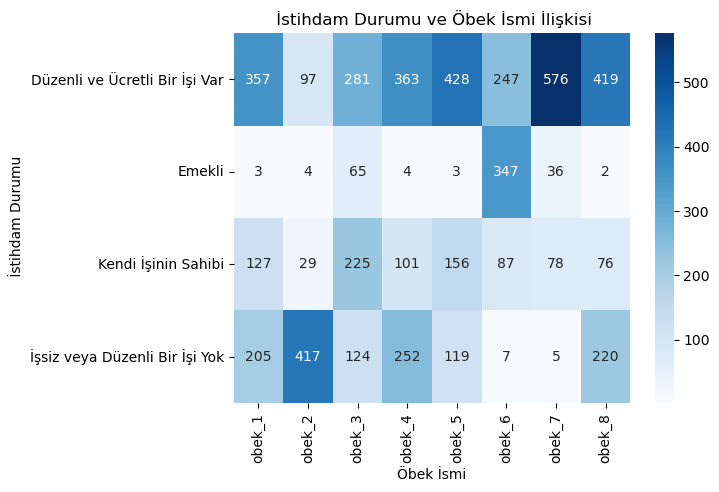

In [42]:
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Öbek İsmi')
plt.ylabel(" İstihdam Durumu")
plt.title(" İstihdam Durumu ve Öbek İsmi İlişkisi")
plt.show()

In [43]:
# İşsiz kesim en çok öbek_2 grubunda ,en az öbek_7 de
# En çok emekli öbek_6 grubunda,en az emekli öbek_8 de
# En çok düzenli işi olanlar öbek_7 de,en az öbek_2 de
# kendi işini kuranlar en çok öbek_3 te, en az öbek_2 de 

In [ ]:
 # Eğitim Düzeyi- Öbek ilişkisi


In [44]:
cross_tab = pd.crosstab(df_train['Yaşadığı Şehir'], df_train['Öbek İsmi'])

print(cross_tab)

Öbek İsmi        obek_1  obek_2  obek_3  obek_4  obek_5  obek_6  obek_7  \
Yaşadığı Şehir                                                            
Büyük Şehir         142     115     215     609     133      38     343   
Köy veya Kasaba     171     118     146      27     224     330      35   
Küçük Şehir         258     203     271      43     348      96     312   
Kırsal              121     111      63      41       1     224       5   

Öbek İsmi        obek_8  
Yaşadığı Şehir           
Büyük Şehir         364  
Köy veya Kasaba      41  
Küçük Şehir         311  
Kırsal                1  


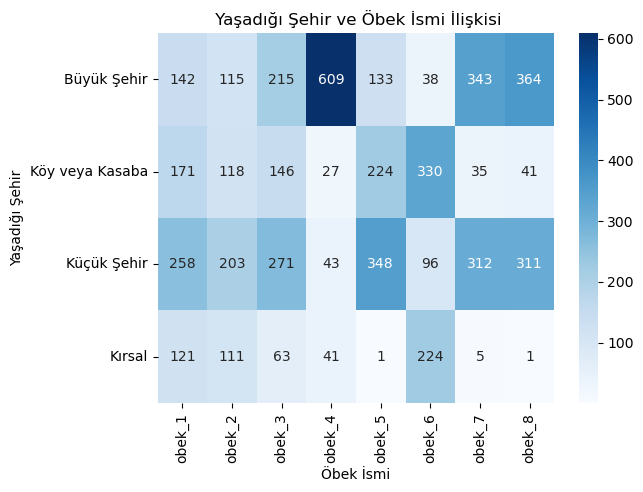

In [45]:
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Öbek İsmi')
plt.ylabel("Yaşadığı Şehir")
plt.title(" Yaşadığı Şehir ve Öbek İsmi İlişkisi")
plt.show()



In [46]:
# Çıkarımlar

# Büyük şehirde en çok yaşayan öbek_4 grubunda iken, en az öbek_6 grubunda yer aliyor
#  En çok köy ve kasaba da yaşayanlar öbek_6 grubunda ,en az yaşayanlar öbek_4 grubunda yer aliyor
#En çok küçük şehir de yaşayanlar öbek_5 grubunda,en az öbek_4 grubunda yer aliyor
# En çok kırsalda yaşayanlar öbek_6 grubunda,en az öbek_5 ve öbek_8 de yer  almaktadır

In [48]:
#En Çok İlgilendiği Ürün Grubu- Öbek ilişkisi



In [49]:
cross_tab = pd.crosstab(df_train['En Çok İlgilendiği Ürün Grubu'], df_train['Öbek İsmi'])

print(cross_tab)

Öbek İsmi                         obek_1  obek_2  obek_3  obek_4  obek_5  \
En Çok İlgilendiği Ürün Grubu                                              
Elektronik ve Teknolojik Ürünler      23      40     202     128     247   
Ev ve Mobilya                         49     211     149     131      48   
Giyim                                435     221     136     156     112   
Kozmetik                             176      30       3     152      74   
Spor Malzemeleri                       9      45     205     153     225   

Öbek İsmi                         obek_6  obek_7  obek_8  
En Çok İlgilendiği Ürün Grubu                             
Elektronik ve Teknolojik Ürünler     118     138     133  
Ev ve Mobilya                        185     189     152  
Giyim                                129     142     156  
Kozmetik                             117     125     152  
Spor Malzemeleri                     139     101     124  


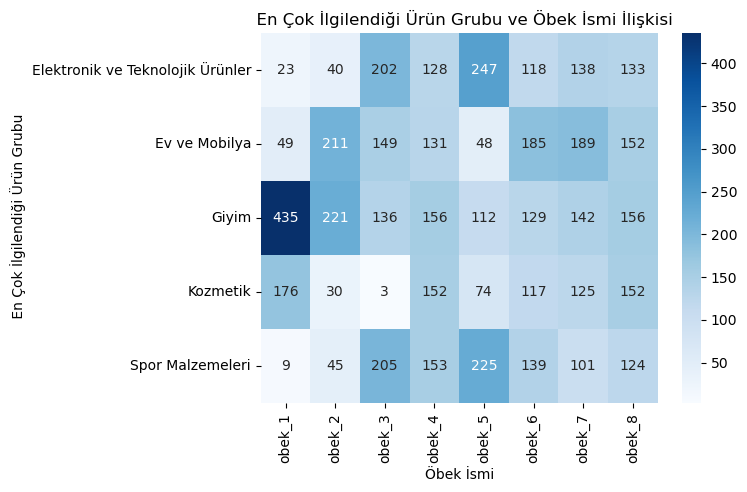

In [50]:
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Öbek İsmi')
plt.ylabel(" En Çok İlgilendiği Ürün Grubu")
plt.title("  En Çok İlgilendiği Ürün Grubu ve Öbek İsmi İlişkisi")
plt.show()



In [51]:
# çıkarımlar

# Elektronik ve Teknolojik aletlerle ilgilenenler en çok öbek_5 grubunda, en az ilgilenler öbek_1 grubunda
# Ev ve mobilya ile en çok ilgilenenler öbek_2 grubunda ,en az ilgilenler öbek_5 grubunda
# Giyim ile en çok ilgilenen kitle öbek_1 grubunda iken en az ilgilenen kitle öbek_5 grubunda
# Kozmetik ile en çok ilgilenen kitle öbek_1 grubunda, en az ilgilenenler öbek_3 te
# Spor malzemeleri ile en çok ilgilenen kitle öbek_5 grubunda,en az ilgenen kitle öbek_1 de

In [52]:
#Eğitime Devam Etme Durumu- Öbek ilişkisi



In [53]:
cross_tab = pd.crosstab(df_train['Eğitime Devam Etme Durumu'], df_train['Öbek İsmi'])

cross_tab

Öbek İsmi                  obek_1  obek_2  obek_3  obek_4  obek_5  obek_6  \
Eğitime Devam Etme Durumu                                                   
Ediyor                         41      21      32      66      48       9   
Etmiyor                       651     526     663     654     658     679   

Öbek İsmi                  obek_7  obek_8  
Eğitime Devam Etme Durumu                  
Ediyor                         68     621  
Etmiyor                       627      96

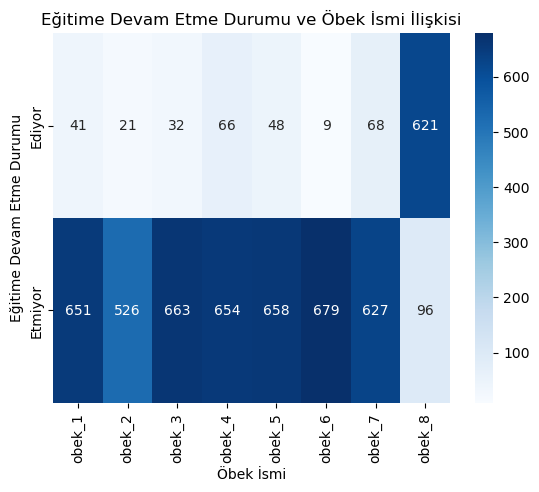

In [54]:
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Öbek İsmi')
plt.ylabel("Eğitime Devam Etme Durumu")
plt.title("Eğitime Devam Etme Durumu ve Öbek İsmi İlişkisi")
plt.show()



In [55]:
# Çıkarımlar;
# Eğitime devam eden kitle en çok öbek_6  grubunda,en az öbek_8 de 

In [58]:
# Öbek İsmi - Yıllık Ortalama Gelir ilişkisi

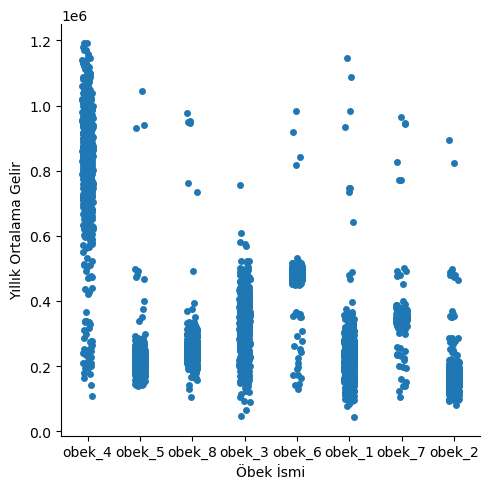

In [57]:
sns.catplot(x="Öbek İsmi", y="Yıllık Ortalama Gelir", data=df_train);


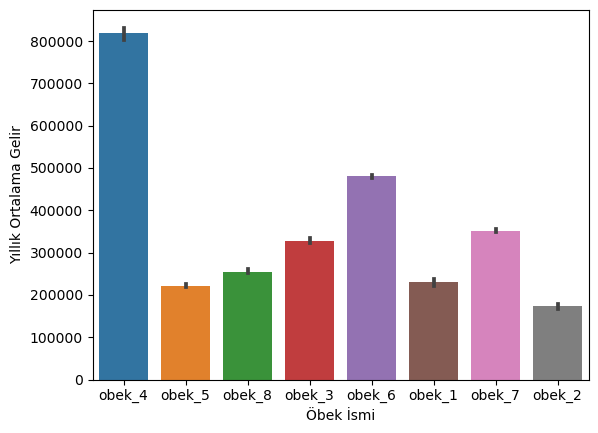

In [60]:
sns.barplot(x="Öbek İsmi", y="Yıllık Ortalama Gelir", data=df_train);


In [61]:
# Çıkarımlar

# Yıllık ortalama gelir en çok öbek_4 grubunda (800000 civarında), en az öbek_2 grubunda (200000 civarında)

In [62]:
#Yıllık Ortalama Satın Alım Miktarı- Öbek ilişkisi


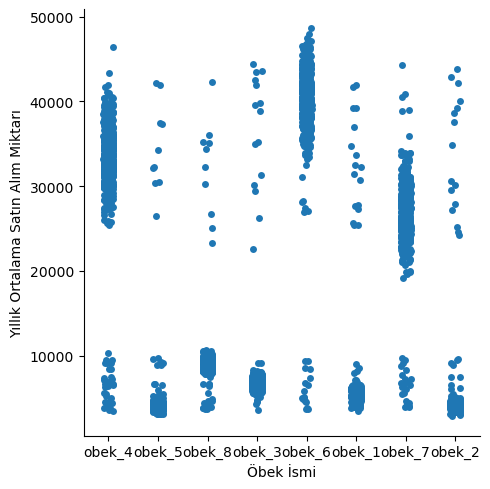

In [63]:
sns.catplot(x="Öbek İsmi", y="Yıllık Ortalama Satın Alım Miktarı", data=df_train);


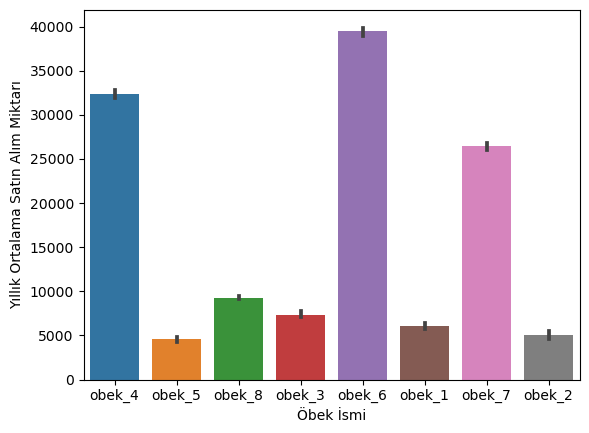

In [64]:
sns.barplot(x="Öbek İsmi", y="Yıllık Ortalama Satın Alım Miktarı", data=df_train);


In [65]:
# çıkarımlar

# Yıllık ortalama satın alım miktarı en çok öbek_6 grubunda, en az öbek_5 grubunda

In [66]:
# Öbek İsmi - Yıllık Ortalama Sipariş Verilen Ürün Adedi

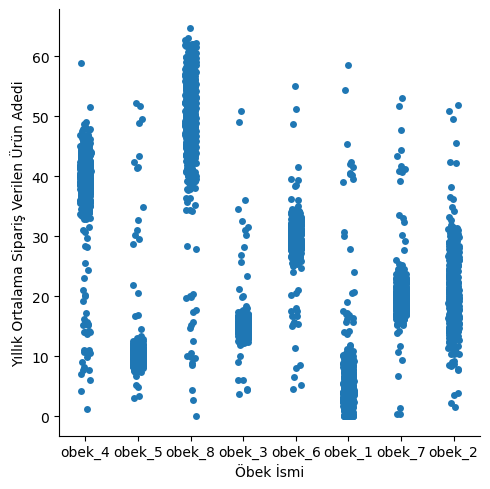

In [67]:
sns.catplot(x="Öbek İsmi", y="Yıllık Ortalama Sipariş Verilen Ürün Adedi", data=df_train);


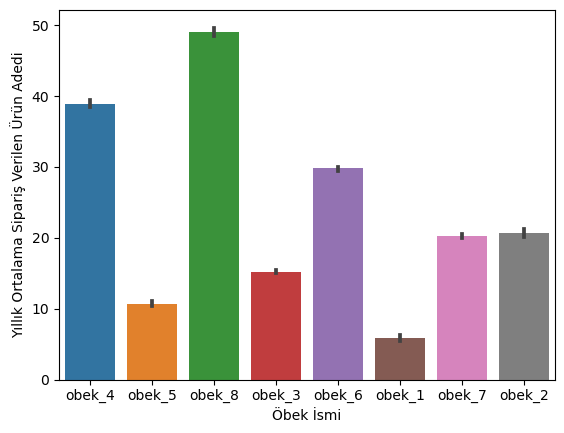

In [68]:
sns.barplot(x="Öbek İsmi", y="Yıllık Ortalama Sipariş Verilen Ürün Adedi", data=df_train);


In [69]:
# Çıkarımlar

# Yıllık ortalama sipariş verilen ürün adedi en çok öbek_8 grubunda, en az öbek_1 grubunda

In [70]:
# Öbek İsmi - Yıllık Ortalama Sepete Atılan Ürün Adedi


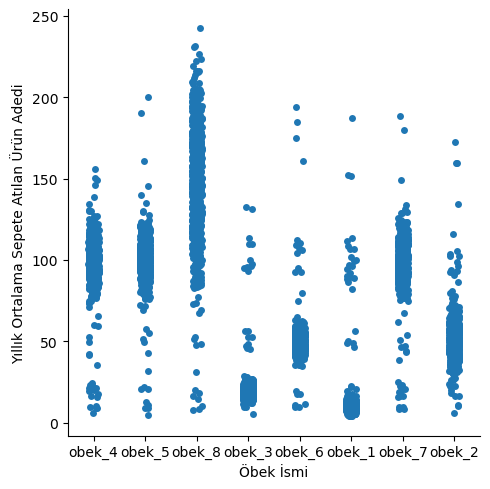

In [71]:
sns.catplot(x="Öbek İsmi", y="Yıllık Ortalama Sepete Atılan Ürün Adedi", data=df_train);


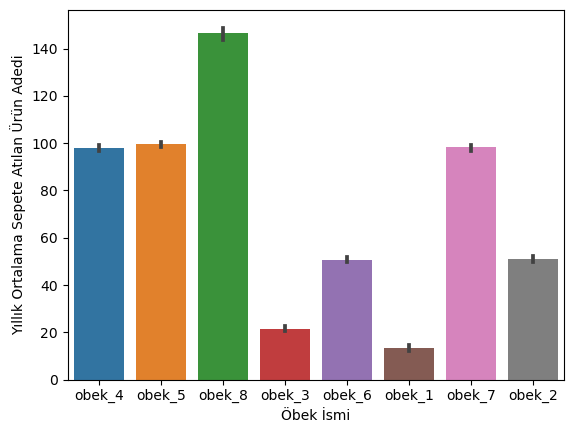

In [72]:
sns.barplot(x="Öbek İsmi", y="Yıllık Ortalama Sepete Atılan Ürün Adedi", data=df_train);


In [73]:
# Çıkarımlar 

# Yıllık ortalama sepete atılan ürün adedi en çok öbek_8 grubunda, en az öbek_1 grubunda yer aliyor

In [14]:
# Yaptığımız Çıkarımlara ek olarak Öbek isminin diğer kategorik değişkenlerle ilişkisini tek bir grafik üzerinde gösterelim

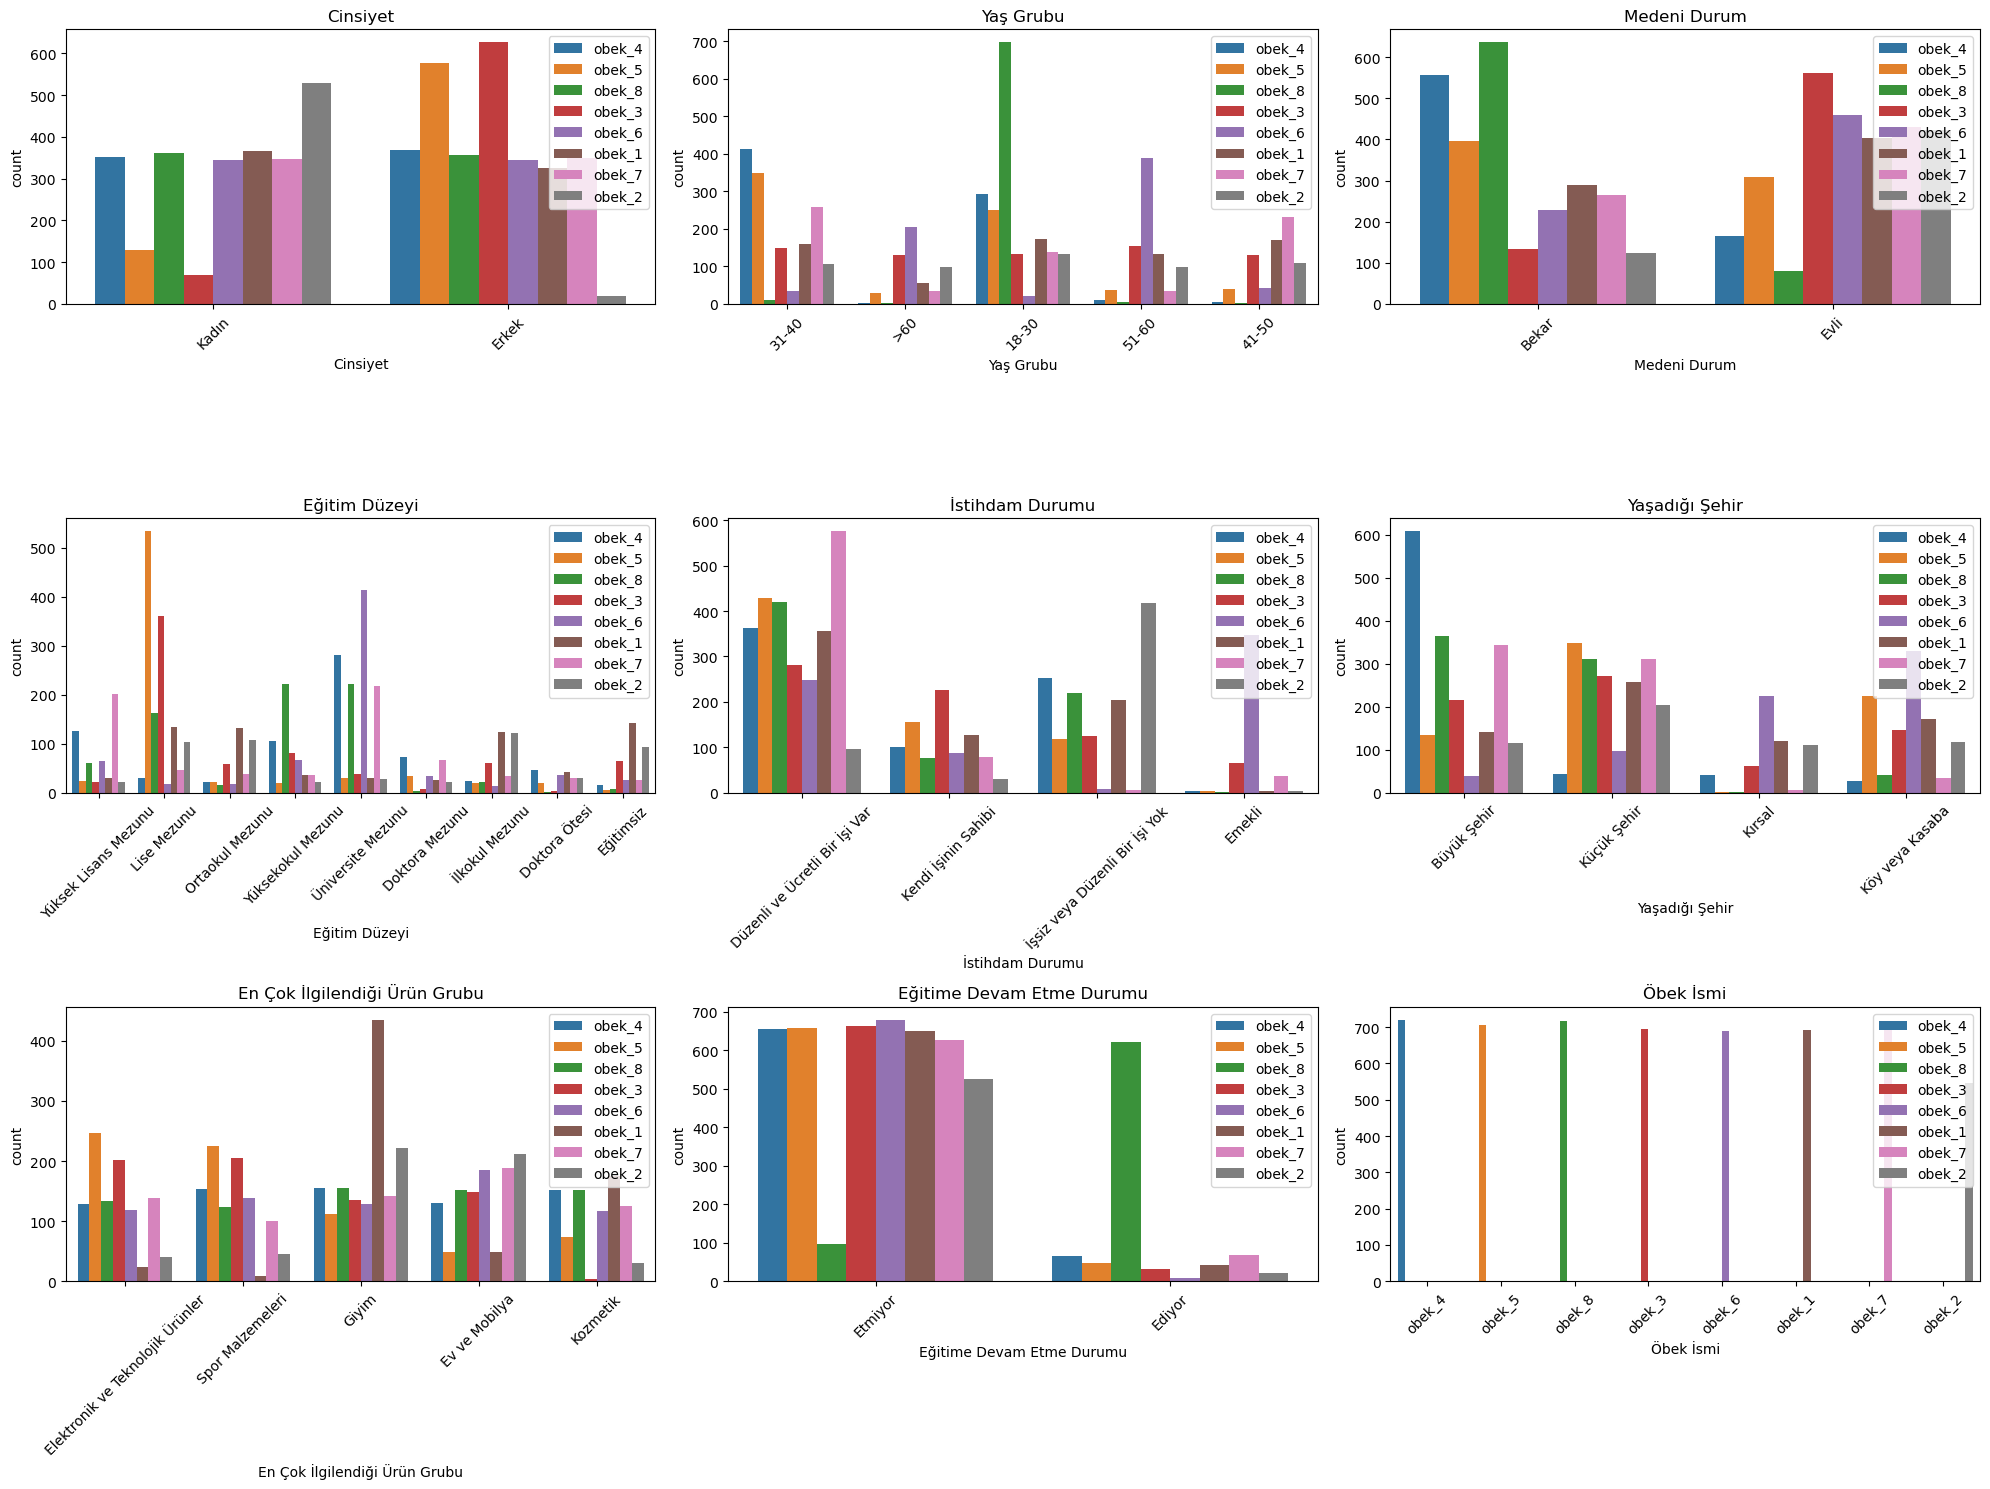

In [13]:
plt.figure(figsize=(20, 15))
for idx, feature in enumerate(cat_list, 1):
    plt.subplot(3, 3, idx)
    sns.countplot(data=df_train, x=feature, hue='Öbek İsmi')
    plt.title(feature)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [16]:
# Görüldüğü gibi grafiği ayrıntılı bir şekilde incelediğimizde yaptığımız çıkarımların doğruluğu ortaya çıkıyor

In [23]:
for i in cat_list:
    print("*"*30)
    print(df_train[i].value_counts())


******************************
Erkek    2964
Kadın    2496
Name: Cinsiyet, dtype: int64
******************************
18-30    1841
31-40    1477
51-60     861
41-50     727
>60       554
Name: Yaş Grubu, dtype: int64
******************************
Evli     2834
Bekar    2626
Name: Medeni Durum, dtype: int64
******************************
Lise Mezunu             1388
Üniversite Mezunu       1257
Yüksekokul Mezunu        588
Yüksek Lisans Mezunu     545
İlkokul Mezunu           417
Ortaokul Mezunu          412
Eğitimsiz                381
Doktora Mezunu           263
Doktora Ötesi            209
Name: Eğitim Düzeyi, dtype: int64
******************************
Düzenli ve Ücretli Bir İşi Var    2768
İşsiz veya Düzenli Bir İşi Yok    1349
Kendi İşinin Sahibi                879
Emekli                             464
Name: İstihdam Durumu, dtype: int64
******************************
Büyük Şehir        1959
Küçük Şehir        1842
Köy veya Kasaba    1092
Kırsal              567
Name: Yaşadığ

## 4.Data Preprocessing

In [24]:
# sayısal değişkenlerin dağılım durumlarını gözlemleyelim

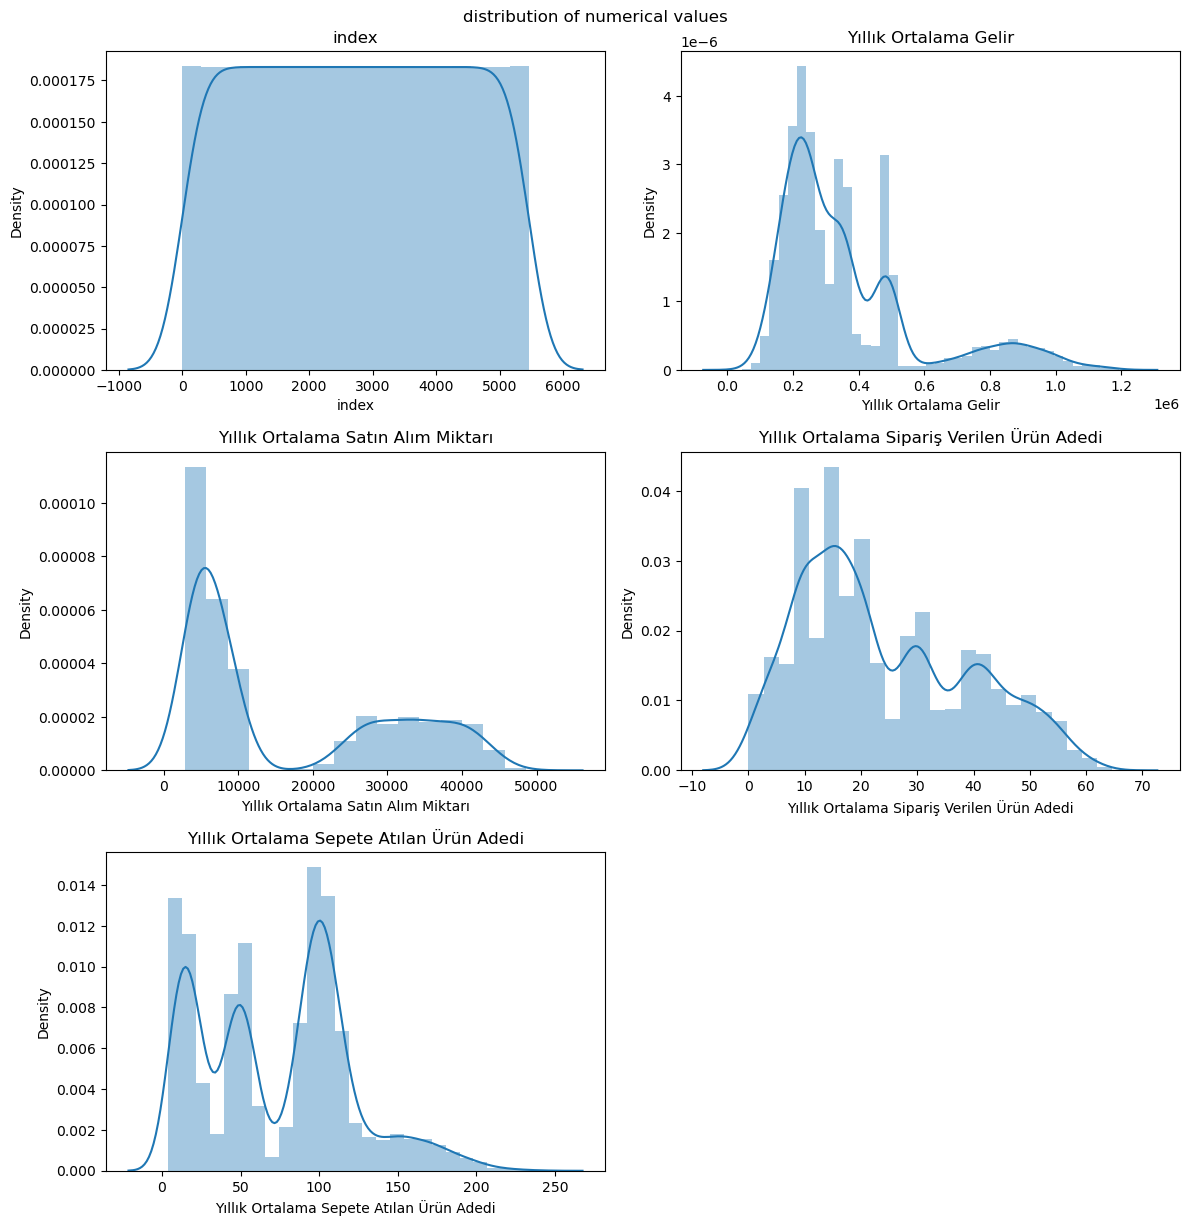

In [25]:
k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of numerical values")

for i in num_list:
    plt.tight_layout()
    plt.subplot(3,2,k)   
    sns.distplot(df_train[i])
    plt.title(i)
    k+=1

In [26]:
# Verilerin dağılımlarını gözlemlemiş olduk

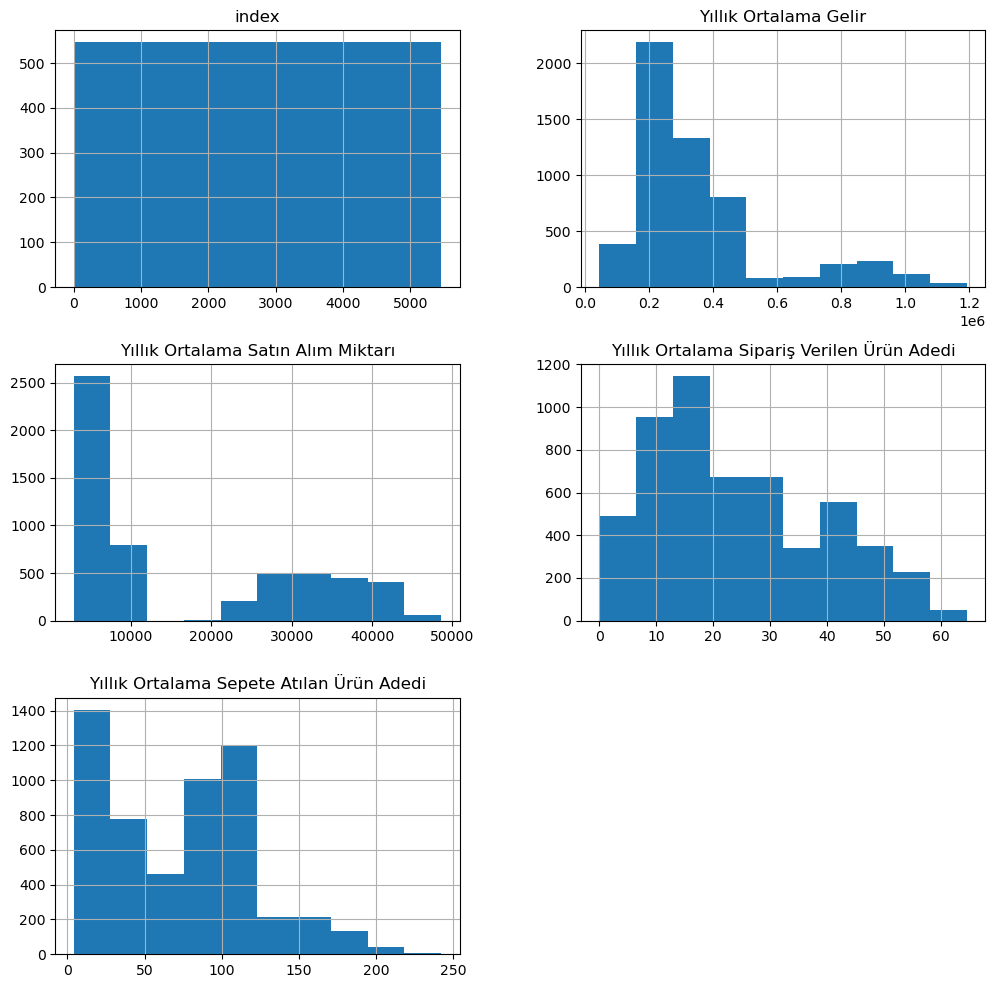

In [27]:
df_train.hist(figsize=(12,12));

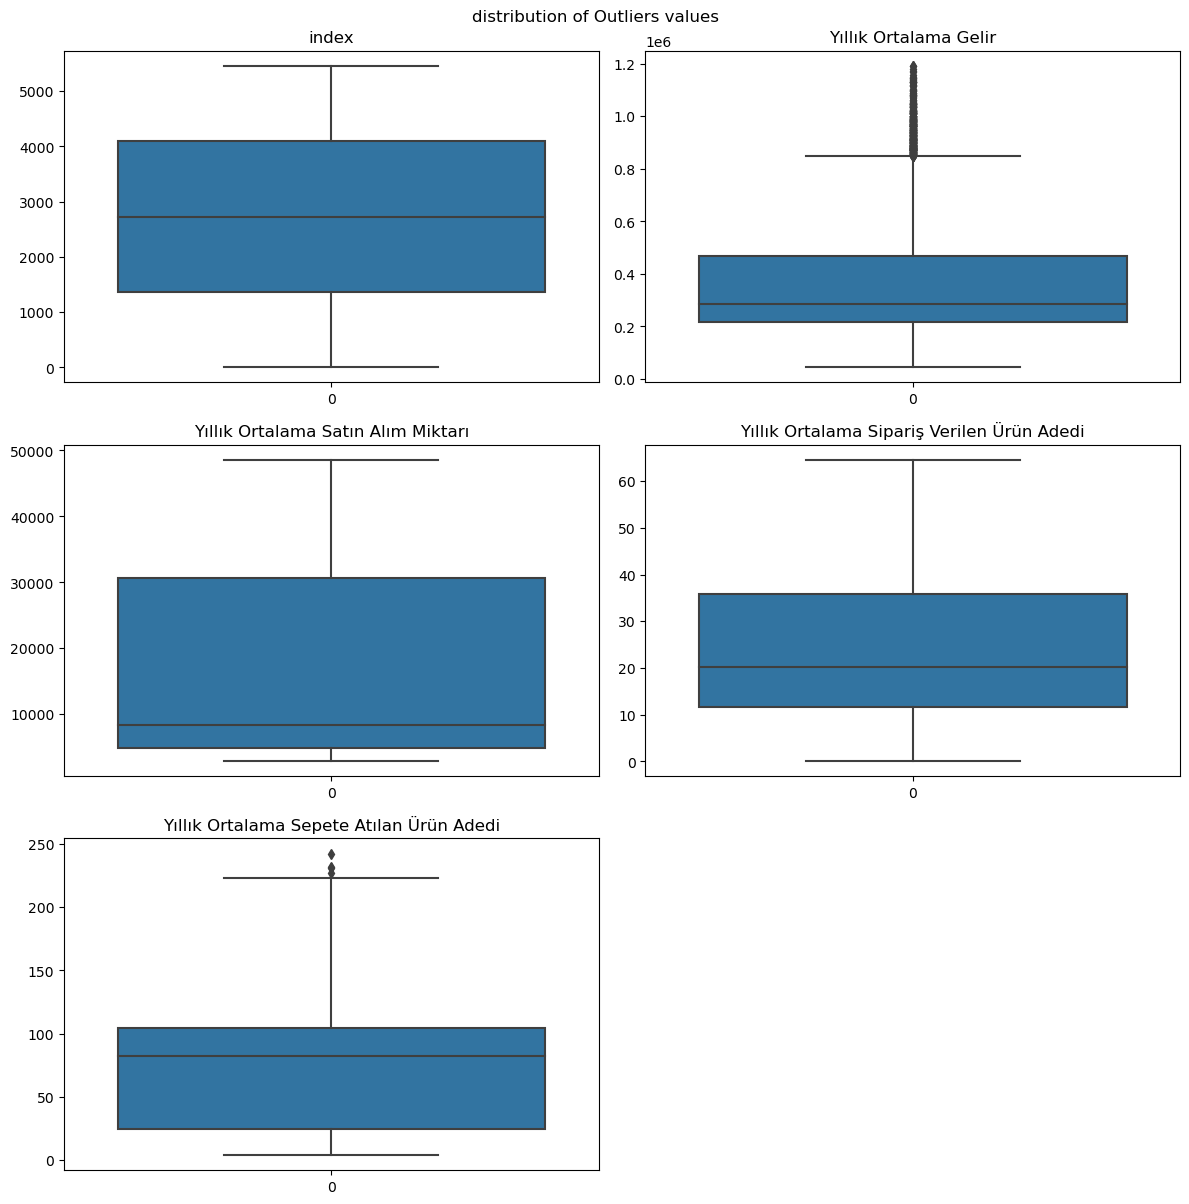

In [28]:
# kutu grafiklerine bakalım


k=1
plt.figure(figsize=(12,12))
plt.suptitle("distribution of Outliers values")

for i in num_list:
    plt.tight_layout()
    plt.subplot(3,2,k)   
    sns.boxplot(df_train[i])
    plt.title(i)
    k+=1
    

In [29]:
# aykırı değer yıllık  ortalama gelirde biraz gözlemlendi onun dışında çok bariz bir şekilde aykırı değer olduğu söylenemez

In [33]:
for i in df_train.loc[:,num_list]:
    Q1 = df_train[i].quantile(0.1)
    Q3 = df_train[i].quantile(0.9)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df_train[(df_train[i] > up) | (df_train[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")


index no
Yıllık Ortalama Gelir no
Yıllık Ortalama Satın Alım Miktarı no
Yıllık Ortalama Sipariş Verilen Ürün Adedi no
Yıllık Ortalama Sepete Atılan Ürün Adedi no


In [34]:
#10 a 90 göre ayırma işlemi yaptığımızda aykırı değer yok
# aykırı değerleri gidermeyeceğiz

In [35]:
# kategorik değerleri görselleştirelim

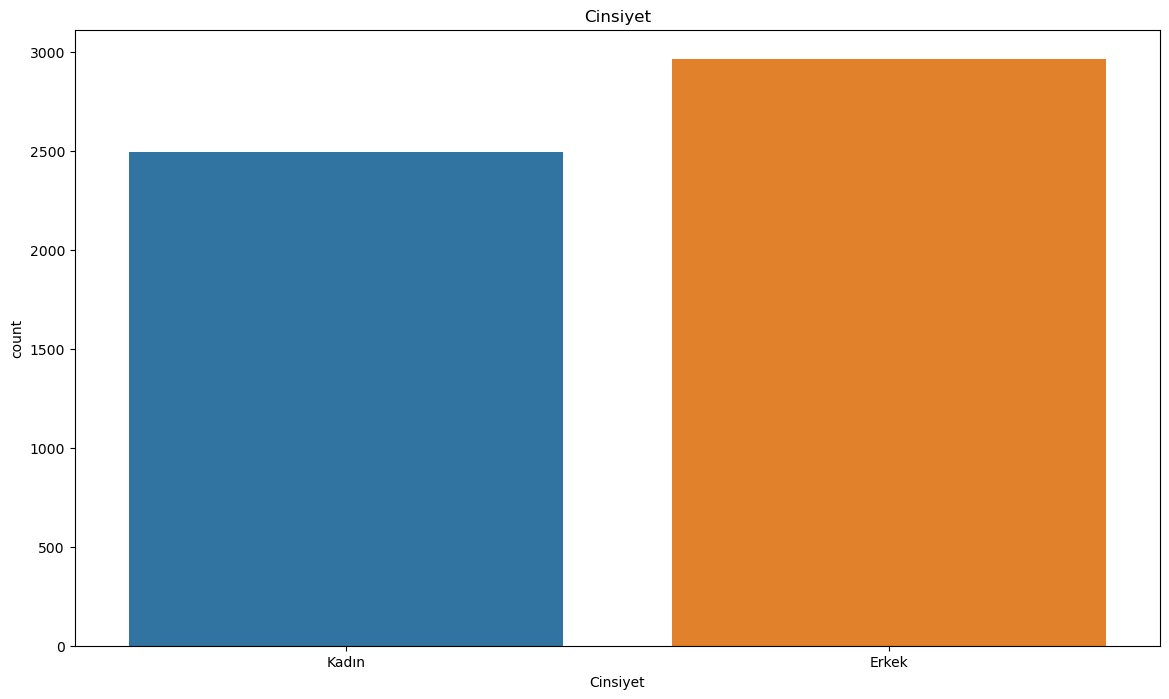

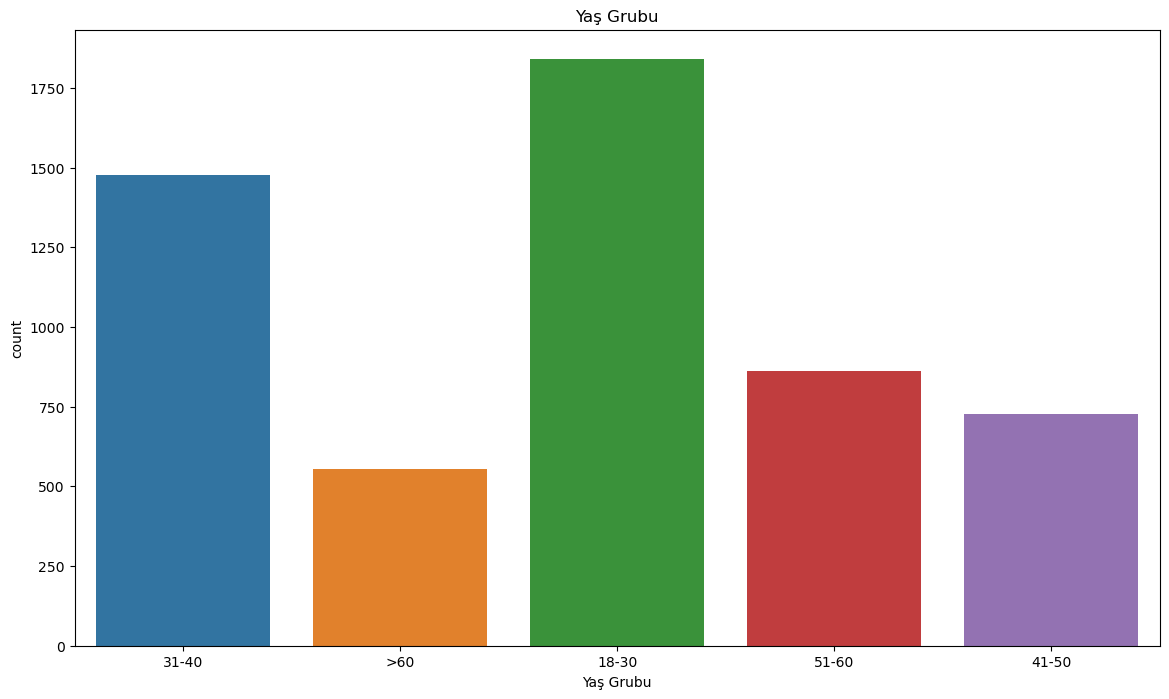

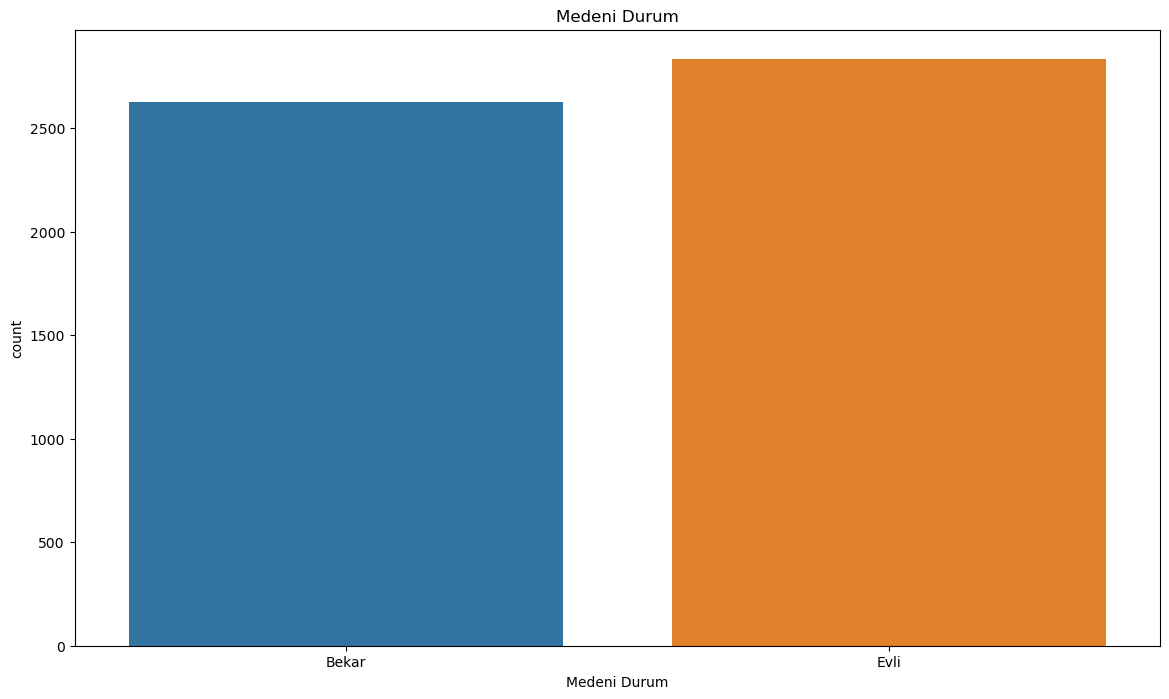

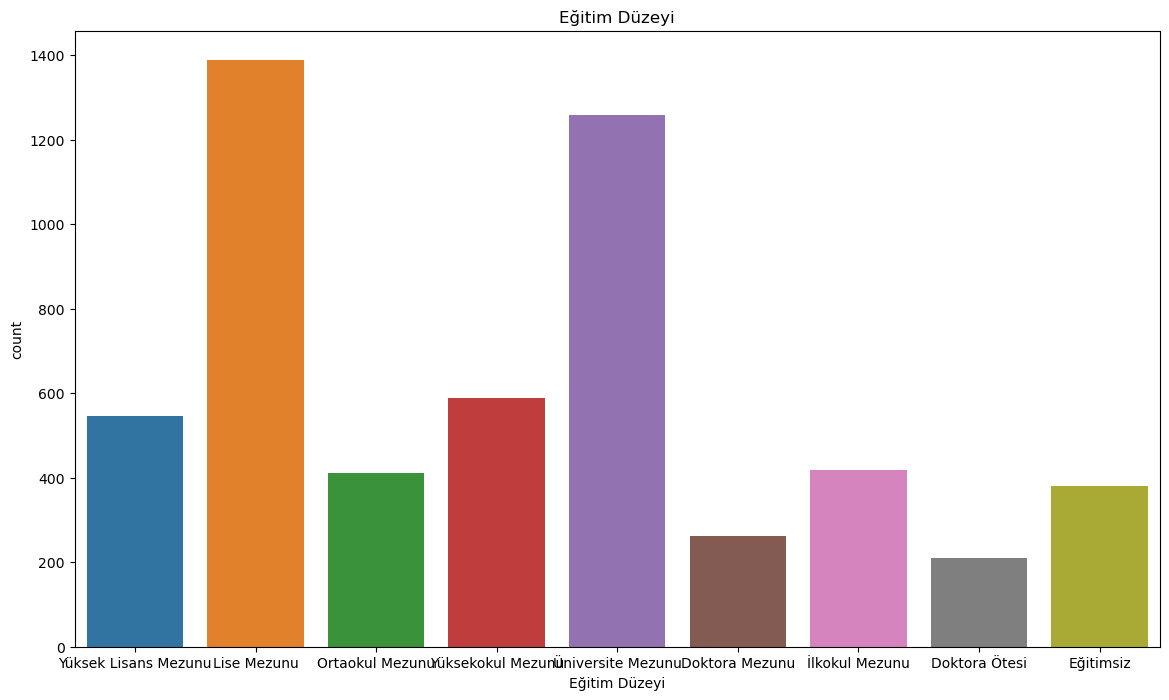

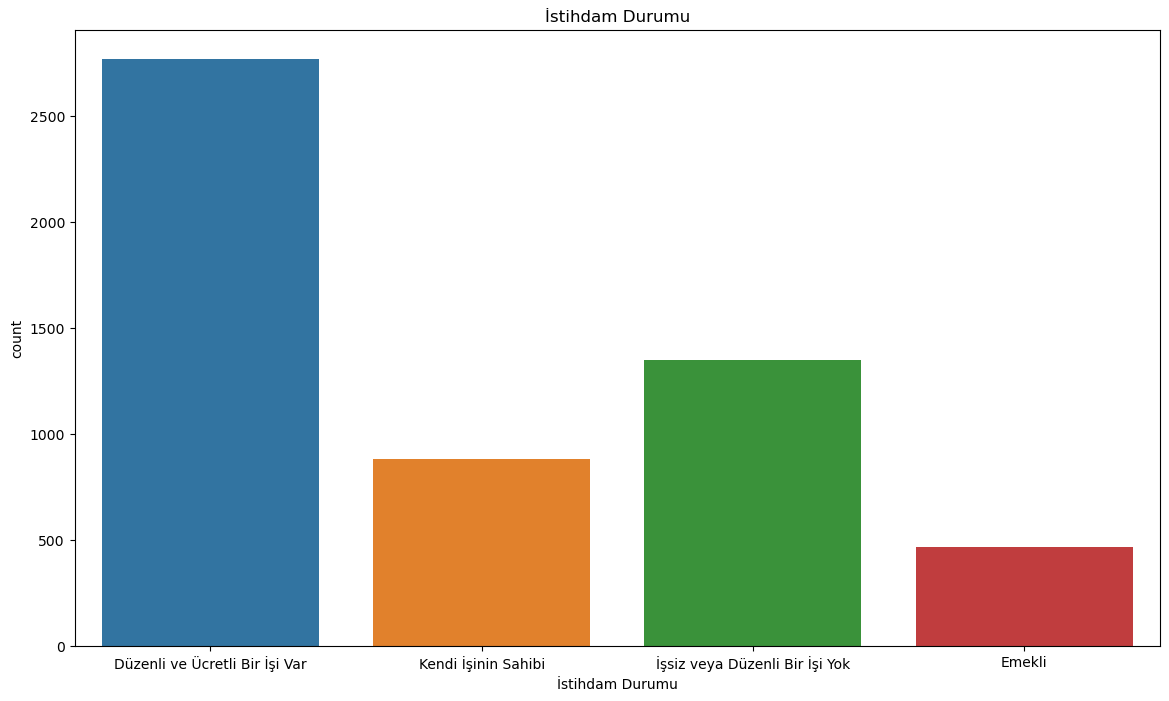

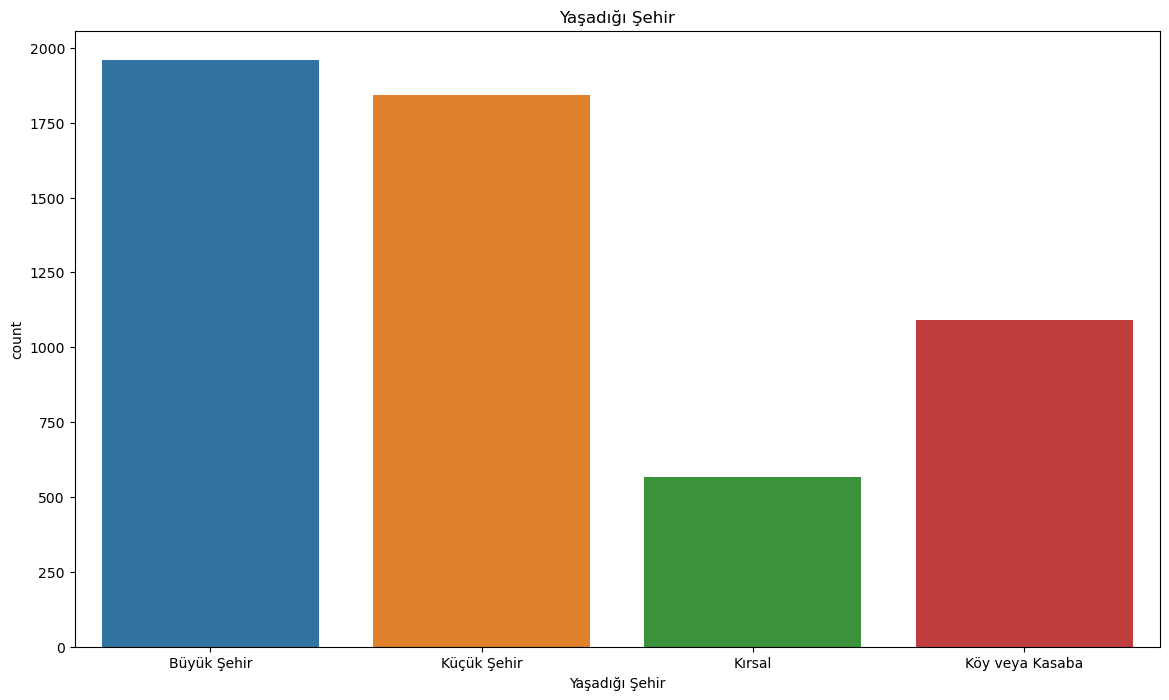

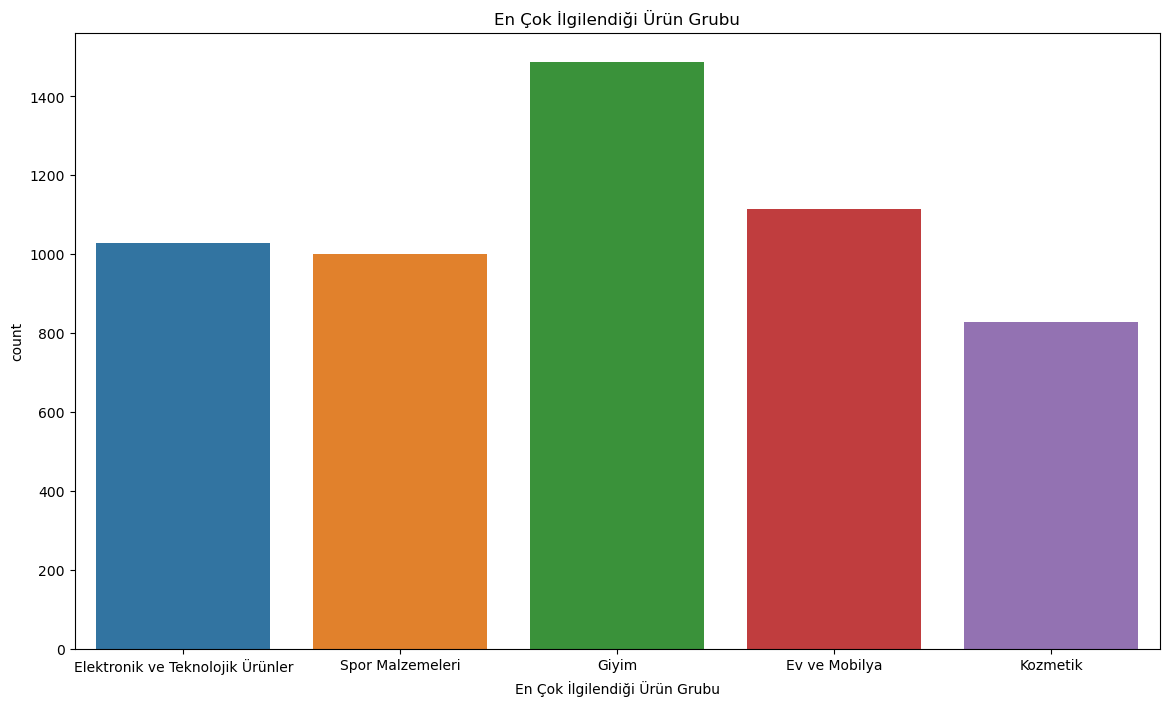

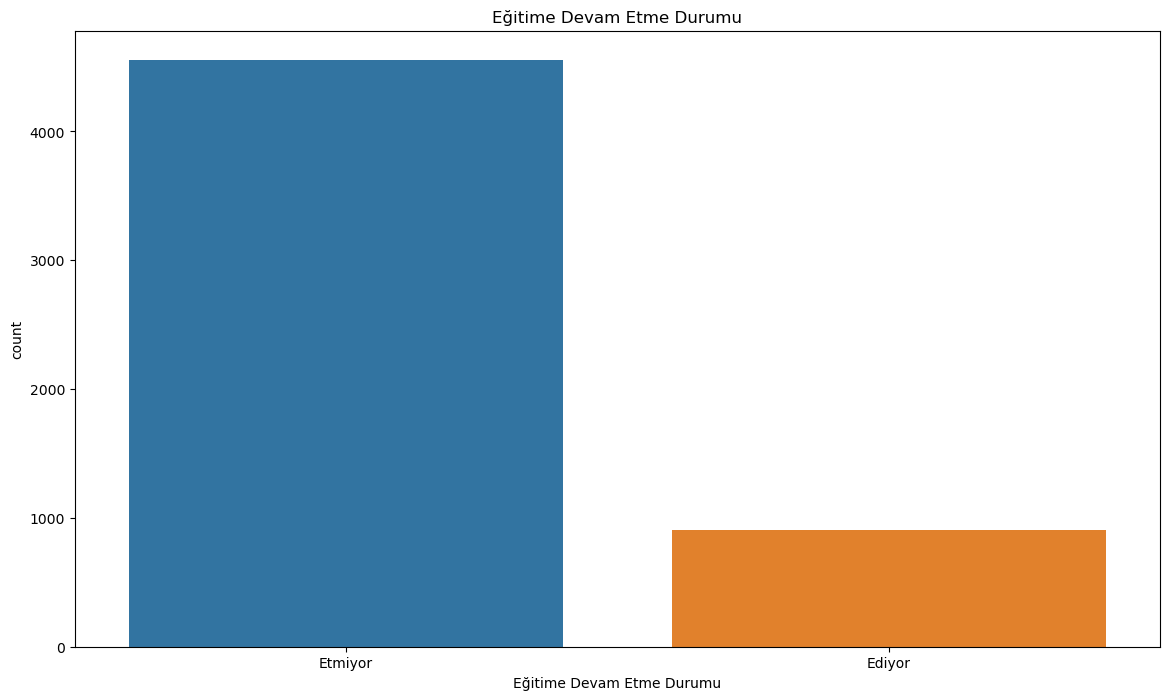

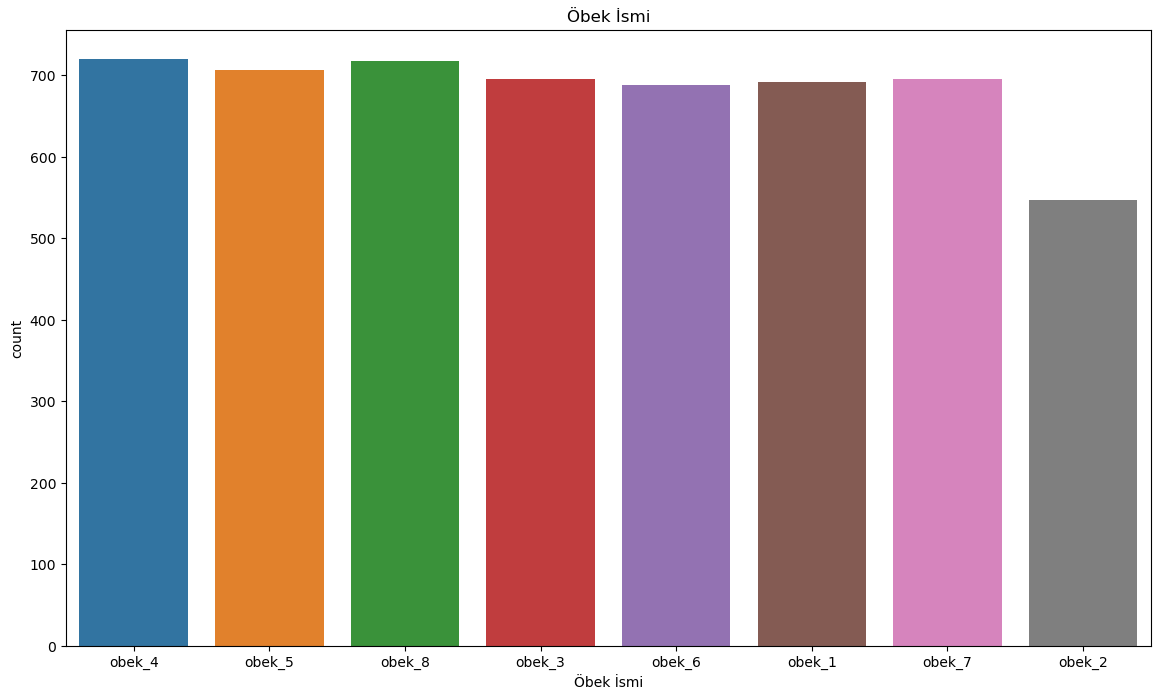

In [36]:
for i in cat_list:
    
    plt.figure(figsize=(14,8))
    sns.countplot(x=i,data=df_train.loc[:,cat_list])
    plt.title(i)

In [37]:
df_train.head()

index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0      0    Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1      1    Erkek       >60         Evli           Lise Mezunu   
2      2    Erkek     18-30        Bekar           Lise Mezunu   
3      3    Erkek     51-60         Evli           Lise Mezunu   
4      4    Erkek     31-40         Evli       Ortaokul Mezunu   

                  İstihdam Durumu  Yıllık Ortalama Gelir Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var          748266.440879    Büyük Şehir   
1             Kendi İşinin Sahibi          246298.609605    Küçük Şehir   
2  Düzenli ve Ücretli Bir İşi Var          268582.732360    Küçük Şehir   
3             Kendi İşinin Sahibi          327721.837865         Kırsal   
4  İşsiz veya Düzenli Bir İşi Yok          397431.626948    Büyük Şehir   

      En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0  Elektronik ve Teknolojik Ürünler                        32010.900881   
1                  Spor Malzemeleri                         4145.729891   
2                             Giyim                         9924.379414   
3                             Giyim                         6417.780714   
4                             Giyim                         7886.663061   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                   37.310644                   Etmiyor   
1                                   11.554851                   Etmiyor   
2                                   55.353236                    Ediyor   
3                                   15.417239                   Etmiyor   
4                                   14.689837                   Etmiyor   

  Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
0    obek_4                                102.936904  
1    obek_5                                 82.176053  
2    obek_8                                141.661426  
3    obek_3                                 17.097397  
4    obek_3                                 20.470459

In [74]:
# Genel görselleştirmeler

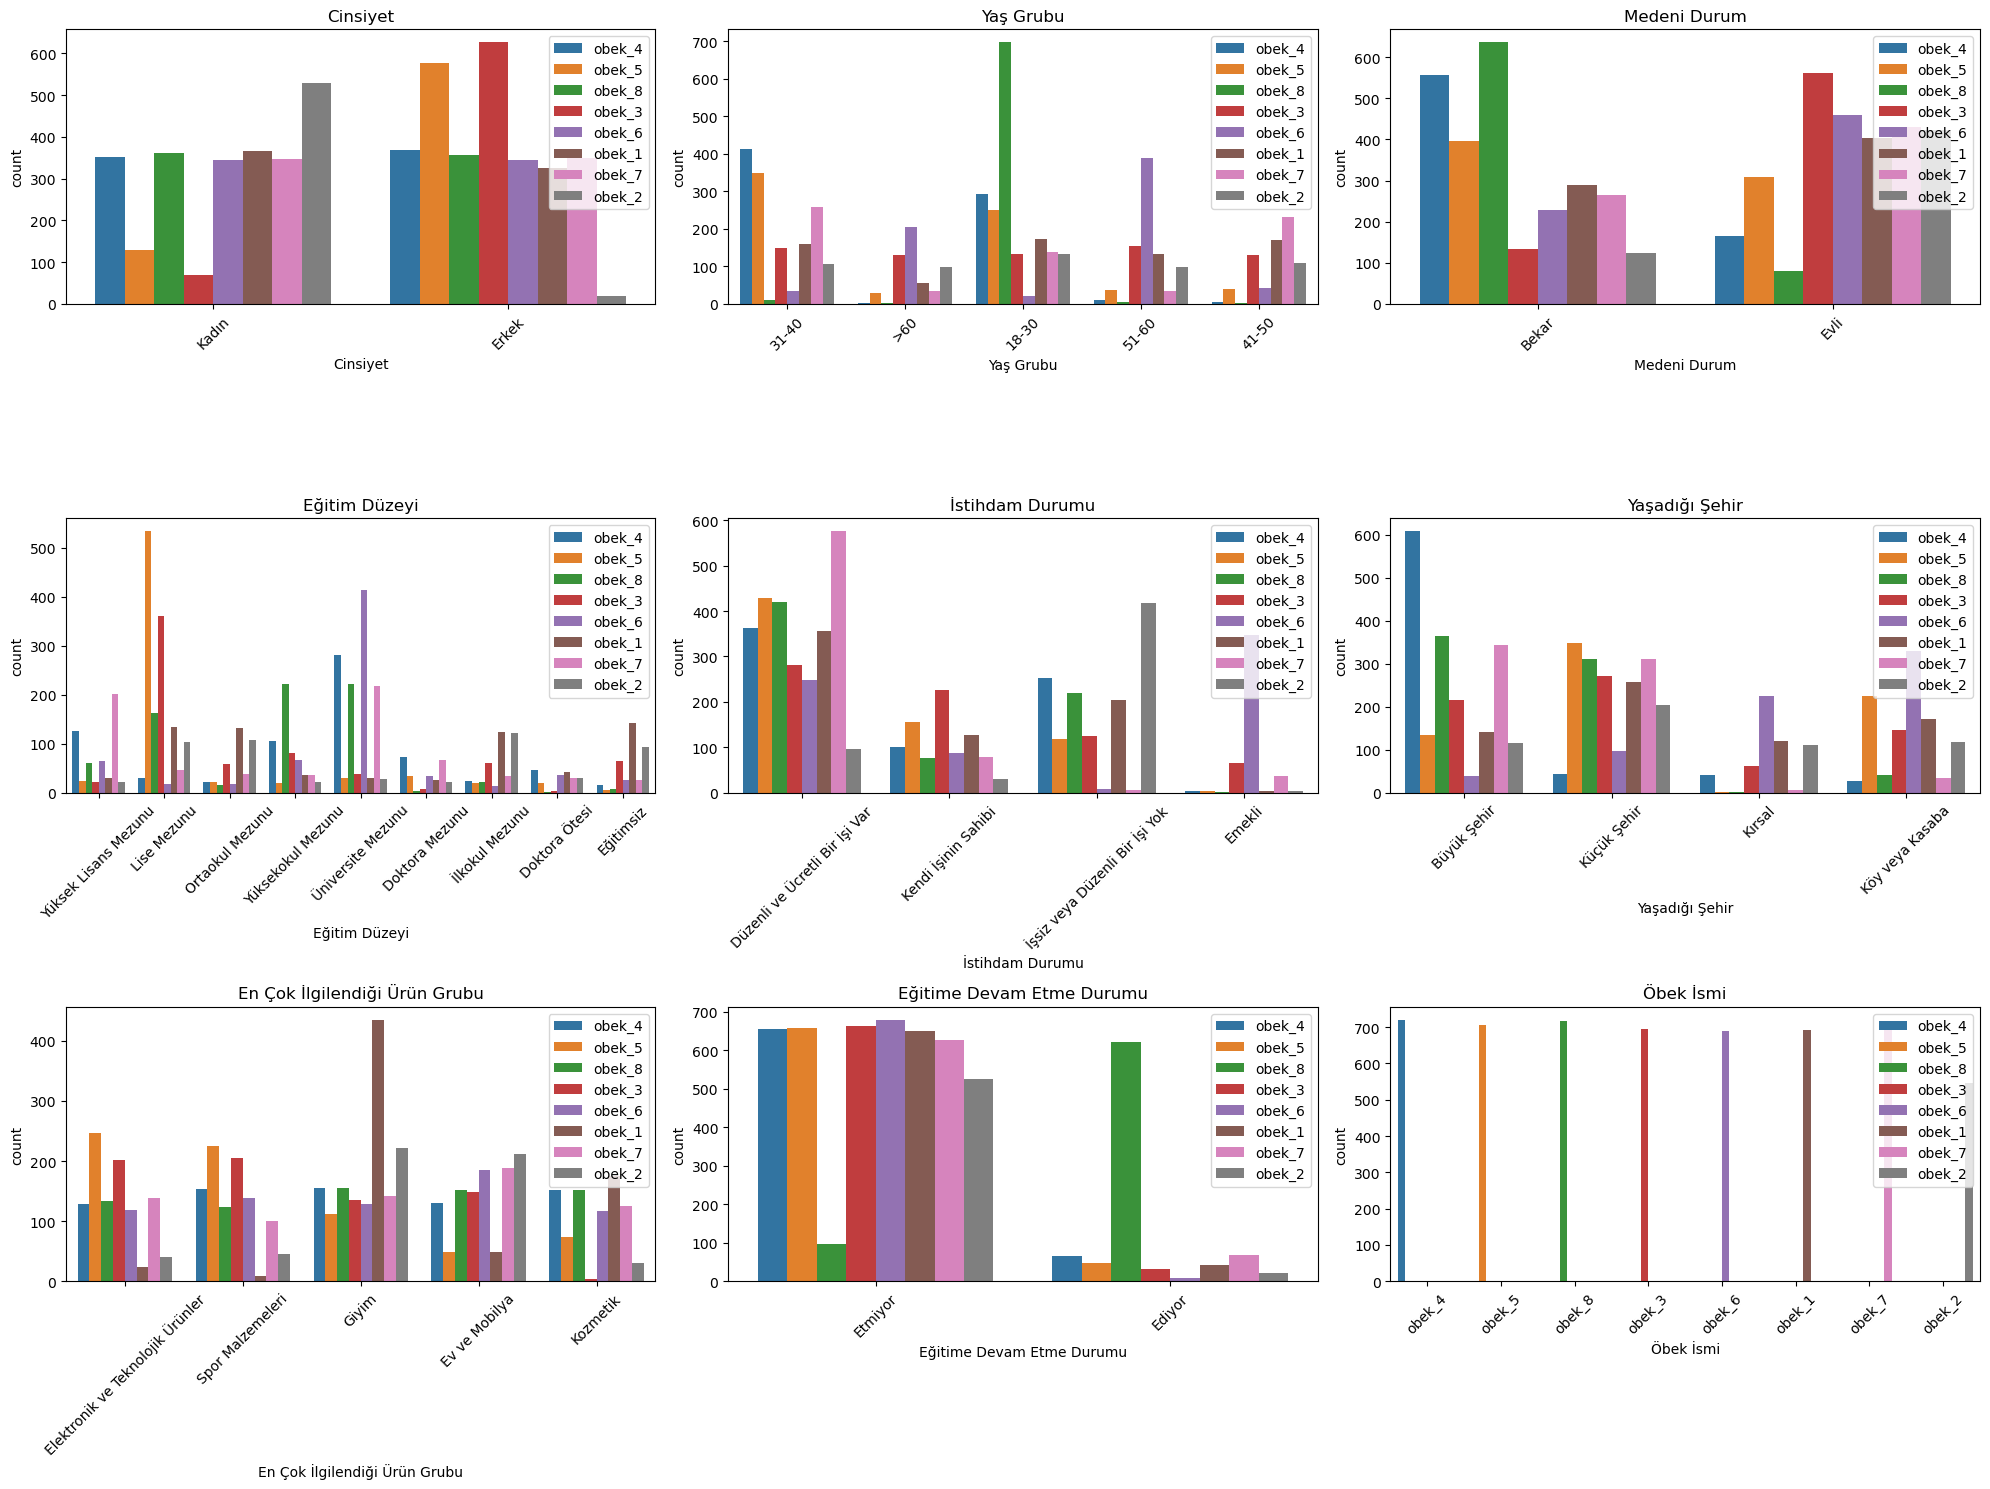

In [75]:
plt.figure(figsize=(20, 15))
for idx, feature in enumerate(cat_list, 1):
    plt.subplot(3, 3, idx)
    sns.countplot(data=df_train, x=feature, hue='Öbek İsmi')
    plt.title(feature)
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [76]:
# Yukarıda öbek isimleri ile ilgili çıkarımlar yaptığımız için burada açıklama yapmayacağım,farklı bir görselleştirme kullandık 

In [38]:
# sayısal değerler arasındaki ilişkiye bakalım

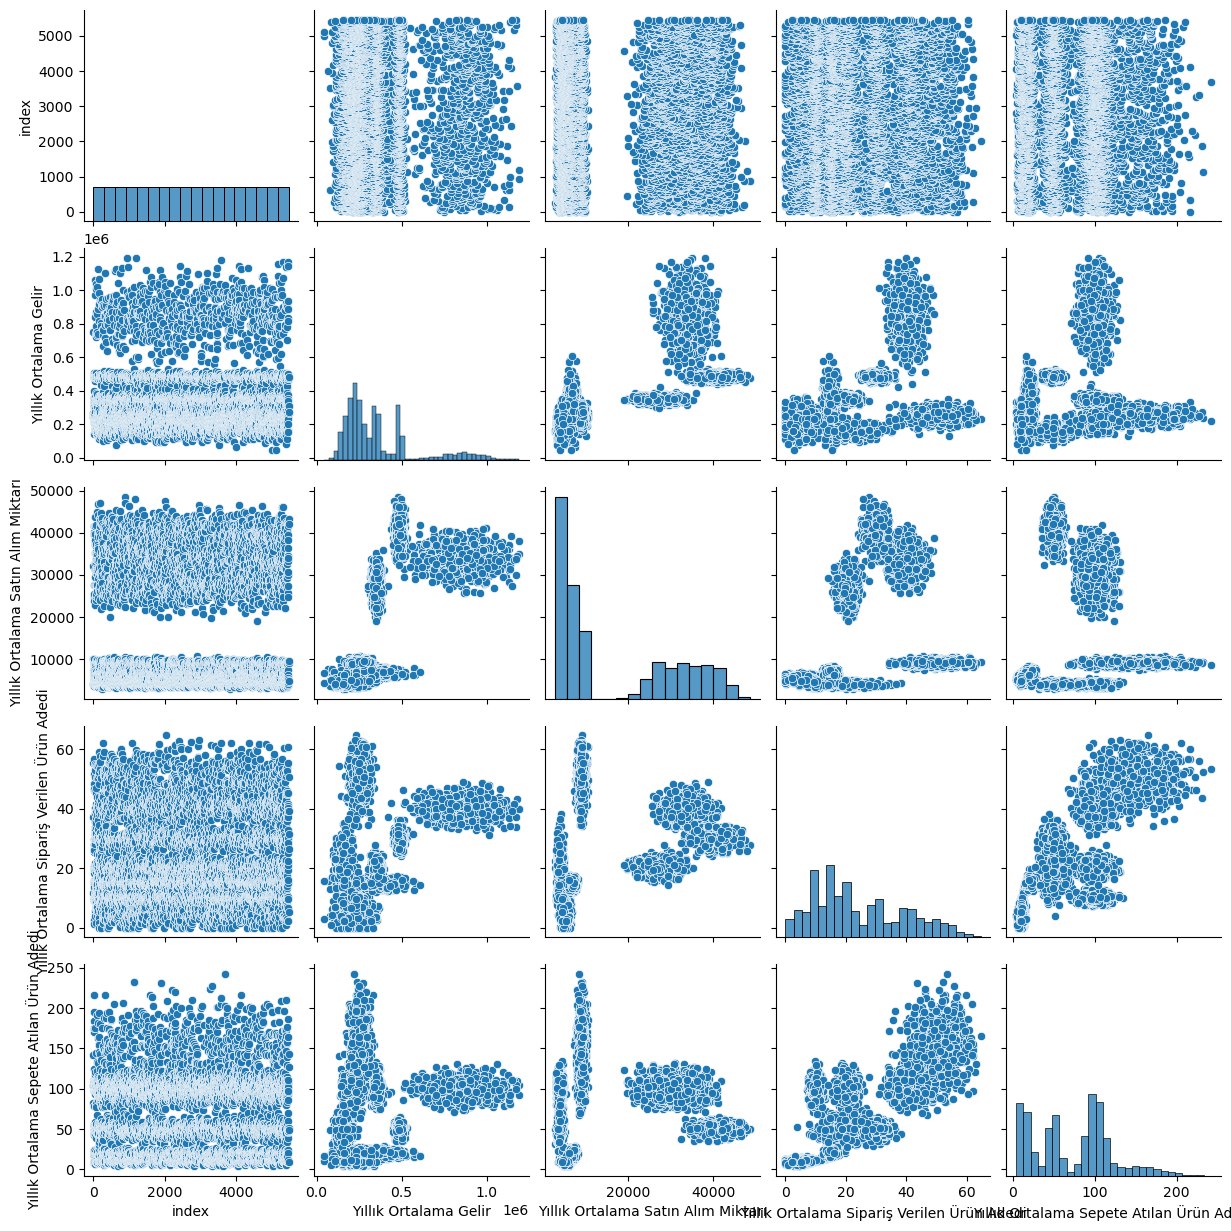

In [39]:
sns.pairplot(df_train.loc[:,num_list])


## K-Means

In [17]:
# ! K-means yöntemi için yeni değişken türettik lakin başarı oranımızı değiştirmediği için final de kullanmadık....

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(df_train)

In [31]:
kmeans=KMeans().fit(X_std)  #model oluşturma


In [32]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer




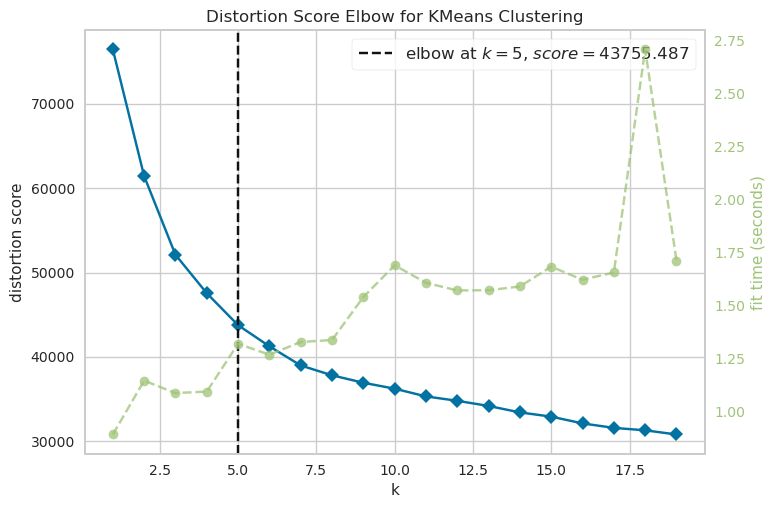

In [33]:

# for K-elbow;

kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,20))
visualizer.fit(X_std)
visualizer.poof()
plt.show()

In [34]:
# Küme sayısını 5 seçelim

In [35]:
#final model;
kmeans=KMeans(n_clusters=5,init="k-means++").fit(X_std)


In [37]:
#etiket değerleri ekleyelim;
cluster=kmeans.labels_

df_train["cluster_no"]=cluster

In [38]:
df_train

index  Cinsiyet  Yaş Grubu  Medeni Durum  Eğitim Düzeyi  \
0         0         0          1             0              5   
1         1         1          4             1              3   
2         2         1          0             0              3   
3         3         1          3             1              3   
4         4         1          1             1              4   
...     ...       ...        ...           ...            ...   
5455   5455         0          4             0              7   
5456   5456         1          3             1              1   
5457   5457         0          3             1              8   
5458   5458         0          0             0              6   
5459   5459         1          0             0              6   

      İstihdam Durumu  Yıllık Ortalama Gelir  Yaşadığı Şehir  \
0                   0          748266.440879               0   
1                   1          246298.609605               2   
2                   0          268582.732360               2   
3                   1          327721.837865               3   
4                   2          397431.626948               0   
...               ...                    ...             ...   
5455                3          478054.247819               1   
5456                1          481852.853651               1   
5457                0          309443.687351               2   
5458                0          266604.268016               0   
5459                0          276155.078333               0   

      En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0                                 0                        32010.900881   
1                                 1                         4145.729891   
2                                 2                         9924.379414   
3                                 2                         6417.780714   
4                                 2                         7886.663061   
...                             ...                                 ...   
5455                              4                        43182.299801   
5456                              3                        42107.996193   
5457                              3                         4655.392445   
5458                              3                         9016.165906   
5459                              1                         9455.657480   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi  Eğitime Devam Etme Durumu  \
0                                      37.310644                          1   
1                                      11.554851                          1   
2                                      55.353236                          0   
3                                      15.417239                          1   
4                                      14.689837                          1   
...                                          ...                        ...   
5455                                   31.356284                          1   
5456                                   26.288620                          1   
5457                                    5.156906                          1   
5458                                   39.205399                          0   
5459                                   50.554188                          0   

      Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  cluster_no  
0             3                                102.936904           3  
1             4                                 82.176053           1  
2             7                                141.661426           2  
3             2                                 17.097397           1  
4             2                                 20.470459           1  
...         ...                                       ...         ...  
5455          5                                 51.600436           0  
5456          5               

In [39]:
# test için

In [40]:
test_std=sc.fit_transform(df_test)

In [41]:
#final model;
kmeans=KMeans(n_clusters=5,init="k-means++").fit(test_std)


In [42]:
#etiket değerleri ekleyelim;
cluster=kmeans.labels_

df_test["cluster_no"]=cluster

In [43]:
df_test

index  Cinsiyet  Yaş Grubu  Medeni Durum  Eğitim Düzeyi  \
0         0         0          3             0              5   
1         1         0          2             1              3   
2         2         1          4             0              2   
3         3         1          3             0              1   
4         4         0          0             0              5   
...     ...       ...        ...           ...            ...   
2335   2335         1          0             1              6   
2336   2336         1          1             0              3   
2337   2337         0          4             0              5   
2338   2338         0          0             0              1   
2339   2339         0          3             0              7   

      İstihdam Durumu  Yıllık Ortalama Gelir  Yaşadığı Şehir  \
0                   0          365331.930346               1   
1                   1          414899.236174               0   
2                   1          152825.872271               2   
3                   0          489052.908472               1   
4                   2          323635.711534               2   
...               ...                    ...             ...   
2335                2          259190.078834               2   
2336                1          194580.563177               3   
2337                0          357730.521969               0   
2338                0          213179.637202               2   
2339                0          519013.573683               1   

      En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0                                 0                         5566.587664   
1                                 1                         6756.766203   
2                                 0                         4493.915682   
3                                 2                        42670.646595   
4                                 0                         5959.266948   
...                             ...                                 ...   
2335                              3                         9559.156534   
2336                              3                         4070.232154   
2337                              3                        22589.204381   
2338                              1                         4205.390562   
2339                              4                        42675.353591   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi  Eğitime Devam Etme Durumu  \
0                                      15.442635                          1   
1                                      14.957246                          1   
2                                      10.907930                          1   
3                                      32.333021                          1   
4                                       4.519968                          1   
...                                          ...                        ...   
2335                                   41.883661                          0   
2336                                   20.082996                          1   
2337                                   18.922305                          1   
2338                                   10.758108                          1   
2339                                   30.826534                          0   

      Yıllık Ortalama Sepete Atılan Ürün Adedi  cluster_no  
0                                    19.646460           4  
1                                    19.675863           4  
2                                    46.904518           4  
3                                    48.083609           2  
4                                    12.752491           4  
...                                        ...         ...  
2335                                117.627785           3  
2336                                 45.659622           4  
2337                                100.691379           

In [92]:
df_train

index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0         0    Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1         1    Erkek       >60         Evli           Lise Mezunu   
2         2    Erkek     18-30        Bekar           Lise Mezunu   
3         3    Erkek     51-60         Evli           Lise Mezunu   
4         4    Erkek     31-40         Evli       Ortaokul Mezunu   
...     ...      ...       ...          ...                   ...   
5455   5455    Kadın       >60        Bekar     Üniversite Mezunu   
5456   5456    Erkek     51-60         Evli         Doktora Ötesi   
5457   5457    Kadın     51-60         Evli        İlkokul Mezunu   
5458   5458    Kadın     18-30        Bekar     Yüksekokul Mezunu   
5459   5459    Erkek     18-30        Bekar     Yüksekokul Mezunu   

                     İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0     Düzenli ve Ücretli Bir İşi Var          748266.440879      Büyük Şehir   
1                Kendi İşinin Sahibi          246298.609605      Küçük Şehir   
2     Düzenli ve Ücretli Bir İşi Var          268582.732360      Küçük Şehir   
3                Kendi İşinin Sahibi          327721.837865           Kırsal   
4     İşsiz veya Düzenli Bir İşi Yok          397431.626948      Büyük Şehir   
...                              ...                    ...              ...   
5455                          Emekli          478054.247819  Köy veya Kasaba   
5456             Kendi İşinin Sahibi          481852.853651  Köy veya Kasaba   
5457  Düzenli ve Ücretli Bir İşi Var          309443.687351      Küçük Şehir   
5458  Düzenli ve Ücretli Bir İşi Var          266604.268016      Büyük Şehir   
5459  Düzenli ve Ücretli Bir İşi Var          276155.078333      Büyük Şehir   

         En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0     Elektronik ve Teknolojik Ürünler                        32010.900881   
1                     Spor Malzemeleri                         4145.729891   
2                                Giyim                         9924.379414   
3                                Giyim                         6417.780714   
4                                Giyim                         7886.663061   
...                                ...                                 ...   
5455                          Kozmetik                        43182.299801   
5456                     Ev ve Mobilya                        42107.996193   
5457                     Ev ve Mobilya                         4655.392445   
5458                     Ev ve Mobilya                         9016.165906   
5459                  Spor Malzemeleri                         9455.657480   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                      37.310644                   Etmiyor   
1                                      11.554851                   Etmiyor   
2                                      55.353236                    Ediyor   
3                                      15.417239                   Etmiyor   
4                                      14.689837                   Etmiyor   
...                                          ...                       ...   
5455                                   31.356284                   Etmiyor   
5456                                   26.288620                   Etmiyor   
5457                                    5.156906                   Etmiyor   
5458                                   39.205399                    Ediyor   
5459                                   50.554188                    Ediyor   

     Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
0       obek_4                                102.936904  
1       obek_5                                 82.176053  
2       obek_8                                141.661426  
3       obek_3                                 17.097397  
4       obek_3                                 

In [91]:
## Feature Engineering

In [18]:
# Özellik Mühendisliği için çok sayıda değişken türettik,başarı oranımız değişmediği için final modelinde kullanmadık

In [94]:
df_train["Yaş Grubu"].value_counts()

18-30    1841
31-40    1477
51-60     861
41-50     727
>60       554
Name: Yaş Grubu, dtype: int64

In [144]:
"""def tanimla_yas_grubu(yas):
    if yas in ['18-30', '31-40']:
        return 'Genç'
    elif yas in ['41-50', '51-60']:
        return 'Orta Yaş'
    elif yas == '>60':
        return 'Yaşlı'
    else:
        return 'Bilinmeyen'"""



"def tanimla_yas_grubu(yas):\n    if yas in ['18-30', '31-40']:\n        return 'Genç'\n    elif yas in ['41-50', '51-60']:\n        return 'Orta Yaş'\n    elif yas == '>60':\n        return 'Yaşlı'\n    else:\n        return 'Bilinmeyen'"

In [143]:
# Yeni yaş grubu değişkenini oluşturalım
#df_train['Yeni Yaş Grubu'] = df_train['Yaş Grubu'].apply(tanimla_yas_grubu)

In [146]:
df_train.describe().T

count           mean  \
index                                       5460.0    2729.500000   
Yıllık Ortalama Gelir                       5460.0  363571.133428   
Yıllık Ortalama Satın Alım Miktarı          5460.0   16616.612217   
Yıllık Ortalama Sipariş Verilen Ürün Adedi  5460.0      24.040884   
Yıllık Ortalama Sepete Atılan Ürün Adedi    5460.0      73.445693   

                                                      std           min  \
index                                         1576.310566      0.000000   
Yıllık Ortalama Gelir                       219714.442407  43922.988693   
Yıllık Ortalama Satın Alım Miktarı           14099.171704   2859.254000   
Yıllık Ortalama Sipariş Verilen Ürün Adedi      14.945655      0.000000   
Yıllık Ortalama Sepete Atılan Ürün Adedi        47.214184      3.977559   

                                                      25%            50%  \
index                                         1364.750000    2729.500000   
Yıllık Ortalama Gelir                       215693.439307  286925.436073   
Yıllık Ortalama Satın Alım Miktarı            4931.859057    8426.818967   
Yıllık Ortalama Sipariş Verilen Ürün Adedi      11.550502      20.095924   
Yıllık Ortalama Sepete Atılan Ürün Adedi        25.009168      82.485579   

                                                      75%           max  
index                                         4094.250000  5.459000e+03  
Yıllık Ortalama Gelir                       468188.221798  1.192437e+06  
Yıllık Ortalama Satın Alım Miktarı           30579.244695  4.860559e+04  
Yıllık Ortalama Sipariş Verilen Ürün Adedi      35.918161  6.461620e+01  
Yıllık Ortalama Sepete Atılan Ürün Adedi       104.473291  2.423084e+02

In [180]:
df_train["Yıllık Ortalama Sepete Atılan Ürün Adedi"].max()

242.30844066611877

In [181]:
df_train["Yıllık Ortalama Sepete Atılan Ürün Adedi"].min()

3.977558775834797

In [182]:
df_train["Yıllık Ortalama Sepete Atılan Ürün Adedi"].mean()

73.44569302866336

In [184]:
def tanimla_urun_adedi(adet):
    if adet < 20:
        return 'Az'
    elif 20 <= adet < 75:
        return 'Orta'
    else:
        return 'Çok'

In [7]:
#df_train['Yeni Değişken'] = df_train['Yıllık Ortalama Sepete Atılan Ürün Adedi'].apply(tanimla_urun_adedi)


In [8]:
df_train.head()

index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0      0    Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1      1    Erkek       >60         Evli           Lise Mezunu   
2      2    Erkek     18-30        Bekar           Lise Mezunu   
3      3    Erkek     51-60         Evli           Lise Mezunu   
4      4    Erkek     31-40         Evli       Ortaokul Mezunu   

                  İstihdam Durumu  Yıllık Ortalama Gelir Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var          748266.440879    Büyük Şehir   
1             Kendi İşinin Sahibi          246298.609605    Küçük Şehir   
2  Düzenli ve Ücretli Bir İşi Var          268582.732360    Küçük Şehir   
3             Kendi İşinin Sahibi          327721.837865         Kırsal   
4  İşsiz veya Düzenli Bir İşi Yok          397431.626948    Büyük Şehir   

      En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0  Elektronik ve Teknolojik Ürünler                        32010.900881   
1                  Spor Malzemeleri                         4145.729891   
2                             Giyim                         9924.379414   
3                             Giyim                         6417.780714   
4                             Giyim                         7886.663061   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                   37.310644                   Etmiyor   
1                                   11.554851                   Etmiyor   
2                                   55.353236                    Ediyor   
3                                   15.417239                   Etmiyor   
4                                   14.689837                   Etmiyor   

  Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
0    obek_4                                102.936904  
1    obek_5                                 82.176053  
2    obek_8                                141.661426  
3    obek_3                                 17.097397  
4    obek_3                                 20.470459

In [9]:
df_train["yeni_değişken"]=df_train["Yıllık Ortalama Satın Alım Miktarı"]/df_train["Yıllık Ortalama Sipariş Verilen Ürün Adedi"]

In [10]:
df_train

index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0         0    Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1         1    Erkek       >60         Evli           Lise Mezunu   
2         2    Erkek     18-30        Bekar           Lise Mezunu   
3         3    Erkek     51-60         Evli           Lise Mezunu   
4         4    Erkek     31-40         Evli       Ortaokul Mezunu   
...     ...      ...       ...          ...                   ...   
5455   5455    Kadın       >60        Bekar     Üniversite Mezunu   
5456   5456    Erkek     51-60         Evli         Doktora Ötesi   
5457   5457    Kadın     51-60         Evli        İlkokul Mezunu   
5458   5458    Kadın     18-30        Bekar     Yüksekokul Mezunu   
5459   5459    Erkek     18-30        Bekar     Yüksekokul Mezunu   

                     İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0     Düzenli ve Ücretli Bir İşi Var          748266.440879      Büyük Şehir   
1                Kendi İşinin Sahibi          246298.609605      Küçük Şehir   
2     Düzenli ve Ücretli Bir İşi Var          268582.732360      Küçük Şehir   
3                Kendi İşinin Sahibi          327721.837865           Kırsal   
4     İşsiz veya Düzenli Bir İşi Yok          397431.626948      Büyük Şehir   
...                              ...                    ...              ...   
5455                          Emekli          478054.247819  Köy veya Kasaba   
5456             Kendi İşinin Sahibi          481852.853651  Köy veya Kasaba   
5457  Düzenli ve Ücretli Bir İşi Var          309443.687351      Küçük Şehir   
5458  Düzenli ve Ücretli Bir İşi Var          266604.268016      Büyük Şehir   
5459  Düzenli ve Ücretli Bir İşi Var          276155.078333      Büyük Şehir   

         En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0     Elektronik ve Teknolojik Ürünler                        32010.900881   
1                     Spor Malzemeleri                         4145.729891   
2                                Giyim                         9924.379414   
3                                Giyim                         6417.780714   
4                                Giyim                         7886.663061   
...                                ...                                 ...   
5455                          Kozmetik                        43182.299801   
5456                     Ev ve Mobilya                        42107.996193   
5457                     Ev ve Mobilya                         4655.392445   
5458                     Ev ve Mobilya                         9016.165906   
5459                  Spor Malzemeleri                         9455.657480   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                      37.310644                   Etmiyor   
1                                      11.554851                   Etmiyor   
2                                      55.353236                    Ediyor   
3                                      15.417239                   Etmiyor   
4                                      14.689837                   Etmiyor   
...                                          ...                       ...   
5455                                   31.356284                   Etmiyor   
5456                                   26.288620                   Etmiyor   
5457                                    5.156906                   Etmiyor   
5458                                   39.205399                    Ediyor   
5459                                   50.554188                    Ediyor   

     Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  yeni_değişken  
0       obek_4                                102.936904     857.956271  
1       obek_5                                 82.176053     358.786954  
2       obek_8                                141.661426     179.291767  
3       obek_3                                

In [145]:
# test için yapalım;

# Yeni yaş grubu değişkenini oluşturalım
#df_test['Yeni Yaş Grubu'] = df_test['Yaş Grubu'].apply(tanimla_yas_grubu)
df_test

index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0         0    Erkek     51-60         Evli  Yüksek Lisans Mezunu   
1         1    Erkek     41-50        Bekar           Lise Mezunu   
2         2    Kadın       >60         Evli             Eğitimsiz   
3         3    Kadın     51-60         Evli         Doktora Ötesi   
4         4    Erkek     18-30         Evli  Yüksek Lisans Mezunu   
...     ...      ...       ...          ...                   ...   
2335   2335    Kadın     18-30        Bekar     Yüksekokul Mezunu   
2336   2336    Kadın     31-40         Evli           Lise Mezunu   
2337   2337    Erkek       >60         Evli  Yüksek Lisans Mezunu   
2338   2338    Erkek     18-30         Evli         Doktora Ötesi   
2339   2339    Erkek     51-60         Evli     Üniversite Mezunu   

                     İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0     Düzenli ve Ücretli Bir İşi Var          365331.930346  Köy veya Kasaba   
1     İşsiz veya Düzenli Bir İşi Yok          414899.236174      Büyük Şehir   
2     İşsiz veya Düzenli Bir İşi Yok          152825.872271      Küçük Şehir   
3     Düzenli ve Ücretli Bir İşi Var          489052.908472  Köy veya Kasaba   
4                Kendi İşinin Sahibi          323635.711534      Küçük Şehir   
...                              ...                    ...              ...   
2335             Kendi İşinin Sahibi          259190.078834      Küçük Şehir   
2336  İşsiz veya Düzenli Bir İşi Yok          194580.563177           Kırsal   
2337  Düzenli ve Ücretli Bir İşi Var          357730.521969      Büyük Şehir   
2338  Düzenli ve Ücretli Bir İşi Var          213179.637202      Küçük Şehir   
2339  Düzenli ve Ücretli Bir İşi Var          519013.573683  Köy veya Kasaba   

         En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0                                Giyim                         5566.587664   
1                     Spor Malzemeleri                         6756.766203   
2                                Giyim                         4493.915682   
3                             Kozmetik                        42670.646595   
4                                Giyim                         5959.266948   
...                                ...                                 ...   
2335                     Ev ve Mobilya                         9559.156534   
2336                     Ev ve Mobilya                         4070.232154   
2337                     Ev ve Mobilya                        22589.204381   
2338                  Spor Malzemeleri                         4205.390562   
2339  Elektronik ve Teknolojik Ürünler                        42675.353591   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                      15.442635                   Etmiyor   
1                                      14.957246                   Etmiyor   
2                                      10.907930                   Etmiyor   
3                                      32.333021                   Etmiyor   
4                                       4.519968                   Etmiyor   
...                                          ...                       ...   
2335                                   41.883661                    Ediyor   
2336                                   20.082996                   Etmiyor   
2337                                   18.922305                   Etmiyor   
2338                                   10.758108                   Etmiyor   
2339                                   30.826534                    Ediyor   

      Yıllık Ortalama Sepete Atılan Ürün Adedi  
0                                    19.646460  
1                                    19.675863  
2                                    46.904518  
3                                    48.083609  
4                                    12.752491  
...                                        ...  

In [148]:
df_train

index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0         0    Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1         1    Erkek       >60         Evli           Lise Mezunu   
2         2    Erkek     18-30        Bekar           Lise Mezunu   
3         3    Erkek     51-60         Evli           Lise Mezunu   
4         4    Erkek     31-40         Evli       Ortaokul Mezunu   
...     ...      ...       ...          ...                   ...   
5455   5455    Kadın       >60        Bekar     Üniversite Mezunu   
5456   5456    Erkek     51-60         Evli         Doktora Ötesi   
5457   5457    Kadın     51-60         Evli        İlkokul Mezunu   
5458   5458    Kadın     18-30        Bekar     Yüksekokul Mezunu   
5459   5459    Erkek     18-30        Bekar     Yüksekokul Mezunu   

                     İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0     Düzenli ve Ücretli Bir İşi Var          748266.440879      Büyük Şehir   
1                Kendi İşinin Sahibi          246298.609605      Küçük Şehir   
2     Düzenli ve Ücretli Bir İşi Var          268582.732360      Küçük Şehir   
3                Kendi İşinin Sahibi          327721.837865           Kırsal   
4     İşsiz veya Düzenli Bir İşi Yok          397431.626948      Büyük Şehir   
...                              ...                    ...              ...   
5455                          Emekli          478054.247819  Köy veya Kasaba   
5456             Kendi İşinin Sahibi          481852.853651  Köy veya Kasaba   
5457  Düzenli ve Ücretli Bir İşi Var          309443.687351      Küçük Şehir   
5458  Düzenli ve Ücretli Bir İşi Var          266604.268016      Büyük Şehir   
5459  Düzenli ve Ücretli Bir İşi Var          276155.078333      Büyük Şehir   

         En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0     Elektronik ve Teknolojik Ürünler                        32010.900881   
1                     Spor Malzemeleri                         4145.729891   
2                                Giyim                         9924.379414   
3                                Giyim                         6417.780714   
4                                Giyim                         7886.663061   
...                                ...                                 ...   
5455                          Kozmetik                        43182.299801   
5456                     Ev ve Mobilya                        42107.996193   
5457                     Ev ve Mobilya                         4655.392445   
5458                     Ev ve Mobilya                         9016.165906   
5459                  Spor Malzemeleri                         9455.657480   

      ...  Eğitime Devam Etme Durumu Öbek İsmi  \
0     ...                    Etmiyor    obek_4   
1     ...                    Etmiyor    obek_5   
2     ...                     Ediyor    obek_8   
3     ...                    Etmiyor    obek_3   
4     ...                    Etmiyor    obek_3   
...   ...                        ...       ...   
5455  ...                    Etmiyor    obek_6   
5456  ...                    Etmiyor    obek_6   
5457  ...                    Etmiyor    obek_1   
5458  ...                     Ediyor    obek_8   
5459  ...                     Ediyor    obek_8   

     Yıllık Ortalama Sepete Atılan Ürün Adedi  \
0                                  102.936904   
1                                   82.176053   
2                                  141.661426   
3                                   17.097397   
4                                   20.470459   
...                                       ...   
5455                                51.600436   
5456                                49.190536   
5457                                 9.537384   
5458                               143.281718   
5459                               127.329348   

                         NEW_istihdam_egitim NEW_cinsiyet_medeni  \
0     Düzenli ve Ücre

### encoding dönüşümlerini uygulayalım

In [150]:
df_train[cat_list]

Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0       Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1       Erkek       >60         Evli           Lise Mezunu   
2       Erkek     18-30        Bekar           Lise Mezunu   
3       Erkek     51-60         Evli           Lise Mezunu   
4       Erkek     31-40         Evli       Ortaokul Mezunu   
...       ...       ...          ...                   ...   
5455    Kadın       >60        Bekar     Üniversite Mezunu   
5456    Erkek     51-60         Evli         Doktora Ötesi   
5457    Kadın     51-60         Evli        İlkokul Mezunu   
5458    Kadın     18-30        Bekar     Yüksekokul Mezunu   
5459    Erkek     18-30        Bekar     Yüksekokul Mezunu   

                     İstihdam Durumu   Yaşadığı Şehir  \
0     Düzenli ve Ücretli Bir İşi Var      Büyük Şehir   
1                Kendi İşinin Sahibi      Küçük Şehir   
2     Düzenli ve Ücretli Bir İşi Var      Küçük Şehir   
3                Kendi İşinin Sahibi           Kırsal   
4     İşsiz veya Düzenli Bir İşi Yok      Büyük Şehir   
...                              ...              ...   
5455                          Emekli  Köy veya Kasaba   
5456             Kendi İşinin Sahibi  Köy veya Kasaba   
5457  Düzenli ve Ücretli Bir İşi Var      Küçük Şehir   
5458  Düzenli ve Ücretli Bir İşi Var      Büyük Şehir   
5459  Düzenli ve Ücretli Bir İşi Var      Büyük Şehir   

         En Çok İlgilendiği Ürün Grubu Eğitime Devam Etme Durumu Öbek İsmi  
0     Elektronik ve Teknolojik Ürünler                   Etmiyor    obek_4  
1                     Spor Malzemeleri                   Etmiyor    obek_5  
2                                Giyim                    Ediyor    obek_8  
3                                Giyim                   Etmiyor    obek_3  
4                                Giyim                   Etmiyor    obek_3  
...                                ...                       ...       ...  
5455                          Kozmetik                   Etmiyor    obek_6  
5456                     Ev ve Mobilya                   Etmiyor    obek_6  
5457                     Ev ve Mobilya                   Etmiyor    obek_1  
5458                     Ev ve Mobilya                    Ediyor    obek_8  
5459                  Spor Malzemeleri                    Ediyor    obek_8  

[5460 rows x 9 columns]

In [207]:
df_train

index  Cinsiyet  Yaş Grubu  Medeni Durum  Eğitim Düzeyi  \
0         0         0          1             0              5   
1         1         1          4             1              3   
2         2         1          0             0              3   
3         3         1          3             1              3   
4         4         1          1             1              4   
...     ...       ...        ...           ...            ...   
5455   5455         0          4             0              7   
5456   5456         1          3             1              1   
5457   5457         0          3             1              8   
5458   5458         0          0             0              6   
5459   5459         1          0             0              6   

      İstihdam Durumu  Yıllık Ortalama Gelir  Yaşadığı Şehir  \
0                   0          748266.440879               0   
1                   1          246298.609605               2   
2                   0          268582.732360               2   
3                   1          327721.837865               3   
4                   2          397431.626948               0   
...               ...                    ...             ...   
5455                3          478054.247819               1   
5456                1          481852.853651               1   
5457                0          309443.687351               2   
5458                0          266604.268016               0   
5459                0          276155.078333               0   

      En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0                                 0                        32010.900881   
1                                 1                         4145.729891   
2                                 2                         9924.379414   
3                                 2                         6417.780714   
4                                 2                         7886.663061   
...                             ...                                 ...   
5455                              4                        43182.299801   
5456                              3                        42107.996193   
5457                              3                         4655.392445   
5458                              3                         9016.165906   
5459                              1                         9455.657480   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi  Eğitime Devam Etme Durumu  \
0                                      37.310644                          1   
1                                      11.554851                          1   
2                                      55.353236                          0   
3                                      15.417239                          1   
4                                      14.689837                          1   
...                                          ...                        ...   
5455                                   31.356284                          1   
5456                                   26.288620                          1   
5457                                    5.156906                          1   
5458                                   39.205399                          0   
5459                                   50.554188                          0   

      Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  Yeni Değişken  
0             3                                102.936904              2  
1             4                                 82.176053              2  
2             7                                141.661426              2  
3             2                                 17.097397              0  
4             2                                 20.470459              1  
...         ...                                       ...            ...  
5455          5                                 51.600436              1  
5456  

In [12]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [13]:
df_train["Yaş Grubu"]=le.fit_transform(df_train["Yaş Grubu"])
df_train["Eğitim Düzeyi"]=le.fit_transform(df_train["Eğitim Düzeyi"])
df_train["Yaşadığı Şehir"]=le.fit_transform(df_train["Yaşadığı Şehir"])
df_train["Eğitime Devam Etme Durumu"]=le.fit_transform(df_train["Eğitime Devam Etme Durumu"])


In [14]:
#df_train["Yeni Yaş Grubu"]=le.fit_transform(df_train["Yeni Yaş Grubu"])
df_train["yeni_değişken"]=le.fit_transform(df_train["yeni_değişken"])



In [176]:
"""df_train['NEW_istihdam_egitim'] = df_train['İstihdam Durumu'] + "_" + df_train['Eğitime Devam Etme Durumu']

df_train['NEW_cinsiyet_medeni'] = df_train['Cinsiyet'] + "_" + df_train['Medeni Durum']

df_train['NEW_yas_ilgi'] = df_train['Yaş Grubu'] + "_" + df_train['En Çok İlgilendiği Ürün Grubu']

df_train['NEW_sehir_yas'] = df_train['Yaşadığı Şehir'] + "_" + df_train['Yaş Grubu']

df_train['NEW_medeni_egitim'] = df_train['Medeni Durum'] + "_" + df_train['Eğitime Devam Etme Durumu']

df_train['NEW_istihdam_yas'] = df_train['İstihdam Durumu'] + "_" + df_train['Yaş Grubu']

df_train['NEW_ilgi_egitim'] = df_train['En Çok İlgilendiği Ürün Grubu'] + "_" + df_train['Eğitime Devam Etme Durumu']
"""

'df_train[\'NEW_istihdam_egitim\'] = df_train[\'İstihdam Durumu\'] + "_" + df_train[\'Eğitime Devam Etme Durumu\']\n\ndf_train[\'NEW_cinsiyet_medeni\'] = df_train[\'Cinsiyet\'] + "_" + df_train[\'Medeni Durum\']\n\ndf_train[\'NEW_yas_ilgi\'] = df_train[\'Yaş Grubu\'] + "_" + df_train[\'En Çok İlgilendiği Ürün Grubu\']\n\ndf_train[\'NEW_sehir_yas\'] = df_train[\'Yaşadığı Şehir\'] + "_" + df_train[\'Yaş Grubu\']\n\ndf_train[\'NEW_medeni_egitim\'] = df_train[\'Medeni Durum\'] + "_" + df_train[\'Eğitime Devam Etme Durumu\']\n\ndf_train[\'NEW_istihdam_yas\'] = df_train[\'İstihdam Durumu\'] + "_" + df_train[\'Yaş Grubu\']\n\ndf_train[\'NEW_ilgi_egitim\'] = df_train[\'En Çok İlgilendiği Ürün Grubu\'] + "_" + df_train[\'Eğitime Devam Etme Durumu\']\n'

In [175]:
"""df_train["NEW_istihdam_egitim"]=le.fit_transform(df_train["NEW_istihdam_egitim"])
df_train["NEW_cinsiyet_medeni"]=le.fit_transform(df_train["NEW_cinsiyet_medeni"])
df_train["NEW_yas_ilgi"]=le.fit_transform(df_train["NEW_yas_ilgi"])
df_train["NEW_sehir_yas"]=le.fit_transform(df_train["NEW_sehir_yas"])
df_train["NEW_medeni_egitim"]=le.fit_transform(df_train["NEW_medeni_egitim"])
df_train["NEW_istihdam_yas"]=le.fit_transform(df_train["NEW_istihdam_yas"])
df_train["NEW_ilgi_egitim"]=le.fit_transform(df_train["NEW_ilgi_egitim"])
"""

'df_train["NEW_istihdam_egitim"]=le.fit_transform(df_train["NEW_istihdam_egitim"])\ndf_train["NEW_cinsiyet_medeni"]=le.fit_transform(df_train["NEW_cinsiyet_medeni"])\ndf_train["NEW_yas_ilgi"]=le.fit_transform(df_train["NEW_yas_ilgi"])\ndf_train["NEW_sehir_yas"]=le.fit_transform(df_train["NEW_sehir_yas"])\ndf_train["NEW_medeni_egitim"]=le.fit_transform(df_train["NEW_medeni_egitim"])\ndf_train["NEW_istihdam_yas"]=le.fit_transform(df_train["NEW_istihdam_yas"])\ndf_train["NEW_ilgi_egitim"]=le.fit_transform(df_train["NEW_ilgi_egitim"])\n'

In [15]:
# ,
col=["En Çok İlgilendiği Ürün Grubu","Cinsiyet","Medeni Durum","İstihdam Durumu"]

for i in col:
    df_train[i] = df_train[i].factorize()[0]


In [16]:
df_train["Öbek İsmi"]

0       obek_4
1       obek_5
2       obek_8
3       obek_3
4       obek_3
         ...  
5455    obek_6
5456    obek_6
5457    obek_1
5458    obek_8
5459    obek_8
Name: Öbek İsmi, Length: 5460, dtype: object

In [17]:
df_train

index  Cinsiyet  Yaş Grubu  Medeni Durum  Eğitim Düzeyi  \
0         0         0          1             0              5   
1         1         1          4             1              3   
2         2         1          0             0              3   
3         3         1          3             1              3   
4         4         1          1             1              4   
...     ...       ...        ...           ...            ...   
5455   5455         0          4             0              7   
5456   5456         1          3             1              1   
5457   5457         0          3             1              8   
5458   5458         0          0             0              6   
5459   5459         1          0             0              6   

      İstihdam Durumu  Yıllık Ortalama Gelir  Yaşadığı Şehir  \
0                   0          748266.440879               0   
1                   1          246298.609605               2   
2                   0          268582.732360               2   
3                   1          327721.837865               3   
4                   2          397431.626948               0   
...               ...                    ...             ...   
5455                3          478054.247819               1   
5456                1          481852.853651               1   
5457                0          309443.687351               2   
5458                0          266604.268016               0   
5459                0          276155.078333               0   

      En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0                                 0                        32010.900881   
1                                 1                         4145.729891   
2                                 2                         9924.379414   
3                                 2                         6417.780714   
4                                 2                         7886.663061   
...                             ...                                 ...   
5455                              4                        43182.299801   
5456                              3                        42107.996193   
5457                              3                         4655.392445   
5458                              3                         9016.165906   
5459                              1                         9455.657480   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi  Eğitime Devam Etme Durumu  \
0                                      37.310644                          1   
1                                      11.554851                          1   
2                                      55.353236                          0   
3                                      15.417239                          1   
4                                      14.689837                          1   
...                                          ...                        ...   
5455                                   31.356284                          1   
5456                                   26.288620                          1   
5457                                    5.156906                          1   
5458                                   39.205399                          0   
5459                                   50.554188                          0   

     Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  yeni_değişken  
0       obek_4                                102.936904           3303  
1       obek_5                                 82.176053           1392  
2       obek_8                                141.661426            526  
3       obek_3                                 17.097397           1837  
4       obek_3                                 20.470459           2643  
...        ...                                       ...            ...  
5455    obek_6                                 51.600436           4608  
5456    obek_6

In [18]:
#df_train["Öbek İsmi"]=df_train["Öbek İsmi"].factorize()[0]

In [19]:
mapping = {'obek_1': 0, 'obek_2': 1, 'obek_3': 2, 'obek_4': 3, 'obek_5': 4, 'obek_6': 5, 'obek_7': 6, 'obek_8': 7}
df_train['Öbek İsmi'] = df_train['Öbek İsmi'].map(mapping)


In [20]:
df_train.head()

index  Cinsiyet  Yaş Grubu  Medeni Durum  Eğitim Düzeyi  İstihdam Durumu  \
0      0         0          1             0              5                0   
1      1         1          4             1              3                1   
2      2         1          0             0              3                0   
3      3         1          3             1              3                1   
4      4         1          1             1              4                2   

   Yıllık Ortalama Gelir  Yaşadığı Şehir  En Çok İlgilendiği Ürün Grubu  \
0          748266.440879               0                              0   
1          246298.609605               2                              1   
2          268582.732360               2                              2   
3          327721.837865               3                              2   
4          397431.626948               0                              2   

   Yıllık Ortalama Satın Alım Miktarı  \
0                        32010.900881   
1                         4145.729891   
2                         9924.379414   
3                         6417.780714   
4                         7886.663061   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi  Eğitime Devam Etme Durumu  \
0                                   37.310644                          1   
1                                   11.554851                          1   
2                                   55.353236                          0   
3                                   15.417239                          1   
4                                   14.689837                          1   

   Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  yeni_değişken  
0          3                                102.936904           3303  
1          4                                 82.176053           1392  
2          7                                141.661426            526  
3          2                                 17.097397           1837  
4          2                                 20.470459           2643

In [107]:
# test verisi içinde yapalım

In [108]:
df_test["Yaş Grubu"]=le.fit_transform(df_test["Yaş Grubu"])
df_test["Eğitim Düzeyi"]=le.fit_transform(df_test["Eğitim Düzeyi"])
df_test["Yaşadığı Şehir"]=le.fit_transform(df_test["Yaşadığı Şehir"])
df_test["Eğitime Devam Etme Durumu"]=le.fit_transform(df_test["Eğitime Devam Etme Durumu"])


In [113]:
df_test["Yeni Yaş Grubu"]=le.fit_transform(df_test["Yeni Yaş Grubu"])


In [109]:
col=["En Çok İlgilendiği Ürün Grubu","Cinsiyet","Medeni Durum","İstihdam Durumu"]

for i in col:
    df_test[i] = df_test[i].factorize()[0]


In [114]:
df_test

index  Cinsiyet  Yaş Grubu  Medeni Durum  Eğitim Düzeyi  \
0         0         0          3             0              5   
1         1         0          2             1              3   
2         2         1          4             0              2   
3         3         1          3             0              1   
4         4         0          0             0              5   
...     ...       ...        ...           ...            ...   
2335   2335         1          0             1              6   
2336   2336         1          1             0              3   
2337   2337         0          4             0              5   
2338   2338         0          0             0              1   
2339   2339         0          3             0              7   

      İstihdam Durumu  Yıllık Ortalama Gelir  Yaşadığı Şehir  \
0                   0          365331.930346               1   
1                   1          414899.236174               0   
2                   1          152825.872271               2   
3                   0          489052.908472               1   
4                   2          323635.711534               2   
...               ...                    ...             ...   
2335                2          259190.078834               2   
2336                1          194580.563177               3   
2337                0          357730.521969               0   
2338                0          213179.637202               2   
2339                0          519013.573683               1   

      En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0                                 0                         5566.587664   
1                                 1                         6756.766203   
2                                 0                         4493.915682   
3                                 2                        42670.646595   
4                                 0                         5959.266948   
...                             ...                                 ...   
2335                              3                         9559.156534   
2336                              3                         4070.232154   
2337                              3                        22589.204381   
2338                              1                         4205.390562   
2339                              4                        42675.353591   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi  Eğitime Devam Etme Durumu  \
0                                      15.442635                          1   
1                                      14.957246                          1   
2                                      10.907930                          1   
3                                      32.333021                          1   
4                                       4.519968                          1   
...                                          ...                        ...   
2335                                   41.883661                          0   
2336                                   20.082996                          1   
2337                                   18.922305                          1   
2338                                   10.758108                          1   
2339                                   30.826534                          0   

      Yıllık Ortalama Sepete Atılan Ürün Adedi  Yeni Yaş Grubu  
0                                    19.646460               1  
1                                    19.675863               1  
2                                    46.904518               2  
3                                    48.083609               1  
4                                    12.752491               0  
...                                        ...             ...  
2335                                117.627785               0  
2336                                 45.659622               0  
2337                 

In [53]:
# Kategorik değerlerimizi dönüştürdük,şimdi korelasyon analizi yapalım

### Korelasyon Analizi

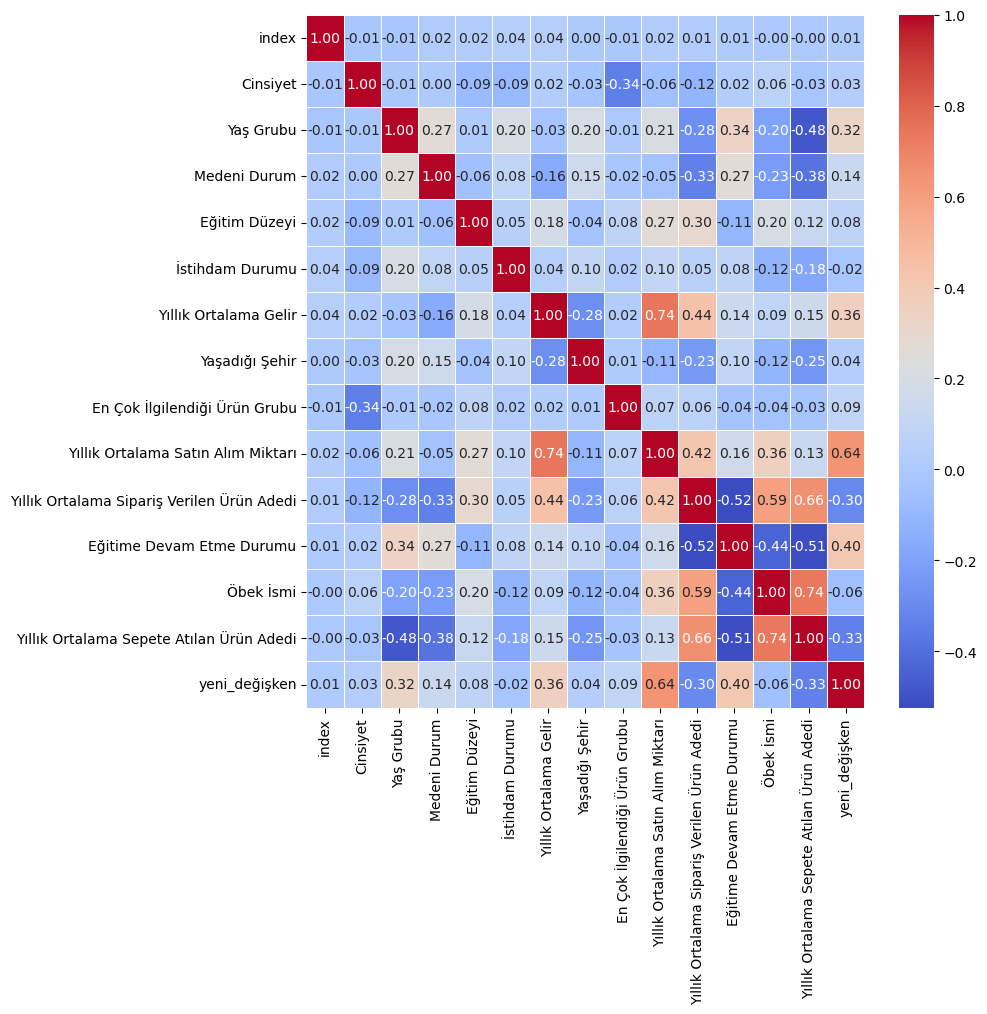

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(df_train.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="coolwarm");

In [22]:
cor=df_train.corr()["Öbek İsmi"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with Öbek İsmi":cor.values})

column  Correlation with Öbek İsmi
0                                    Öbek İsmi                    1.000000
1     Yıllık Ortalama Sepete Atılan Ürün Adedi                    0.736725
2   Yıllık Ortalama Sipariş Verilen Ürün Adedi                    0.590661
3           Yıllık Ortalama Satın Alım Miktarı                    0.360671
4                                Eğitim Düzeyi                    0.196581
5                        Yıllık Ortalama Gelir                    0.086821
6                                     Cinsiyet                    0.060093
7                                        index                   -0.003226
8                En Çok İlgilendiği Ürün Grubu                   -0.042162
9                                yeni_değişken                   -0.056532
10                              Yaşadığı Şehir                   -0.116312
11                             İstihdam Durumu                   -0.121484
12                                   Yaş Grubu                   -0.201421
13                                Medeni Durum                   -0.228713
14                   Eğitime Devam Etme Durumu                   -0.437986

In [124]:
df_train.drop("Yaş Grubu",axis=1,inplace=True)
df_test.drop("Yaş Grubu",axis=1,inplace=True)

In [56]:
# Değişkenler arasında yüksek bir ilişki yok,Modelleme aşamasına geçelim

## 5.Model

### Kullanılan Modeller:

* 1.Logistic Regresyon
* 2.Naiv Bayes
* 3.K-En yakın Komşu
* 4.Adaboost 
* 5.Support Vector Machines
* 6.MLC (YSA)
* 7. Decision Tree
* 8. Random Forest
* 9. Xgboost
* 10. Gradient Boosting 
* 11.Lightgbm
* 12.Catboost

## En başarılı Model(Kullanılan Model) : Lightgbm

In [23]:
X=df_train.drop("Öbek İsmi",axis=1)
y=df_train["Öbek İsmi"]

In [24]:
X

index  Cinsiyet  Yaş Grubu  Medeni Durum  Eğitim Düzeyi  \
0         0         0          1             0              5   
1         1         1          4             1              3   
2         2         1          0             0              3   
3         3         1          3             1              3   
4         4         1          1             1              4   
...     ...       ...        ...           ...            ...   
5455   5455         0          4             0              7   
5456   5456         1          3             1              1   
5457   5457         0          3             1              8   
5458   5458         0          0             0              6   
5459   5459         1          0             0              6   

      İstihdam Durumu  Yıllık Ortalama Gelir  Yaşadığı Şehir  \
0                   0          748266.440879               0   
1                   1          246298.609605               2   
2                   0          268582.732360               2   
3                   1          327721.837865               3   
4                   2          397431.626948               0   
...               ...                    ...             ...   
5455                3          478054.247819               1   
5456                1          481852.853651               1   
5457                0          309443.687351               2   
5458                0          266604.268016               0   
5459                0          276155.078333               0   

      En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0                                 0                        32010.900881   
1                                 1                         4145.729891   
2                                 2                         9924.379414   
3                                 2                         6417.780714   
4                                 2                         7886.663061   
...                             ...                                 ...   
5455                              4                        43182.299801   
5456                              3                        42107.996193   
5457                              3                         4655.392445   
5458                              3                         9016.165906   
5459                              1                         9455.657480   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi  Eğitime Devam Etme Durumu  \
0                                      37.310644                          1   
1                                      11.554851                          1   
2                                      55.353236                          0   
3                                      15.417239                          1   
4                                      14.689837                          1   
...                                          ...                        ...   
5455                                   31.356284                          1   
5456                                   26.288620                          1   
5457                                    5.156906                          1   
5458                                   39.205399                          0   
5459                                   50.554188                          0   

      Yıllık Ortalama Sepete Atılan Ürün Adedi  yeni_değişken  
0                                   102.936904           3303  
1                                    82.176053           1392  
2                                   141.661426            526  
3                                    17.097397           1837  
4                                    20.470459           2643  
...                                        ...            ...  
5455                                 51.600436           4608  
5456                                 49.190536           5147  
5457                          

In [25]:
y

0       3
1       4
2       7
3       2
4       2
       ..
5455    5
5456    5
5457    0
5458    7
5459    7
Name: Öbek İsmi, Length: 5460, dtype: int64

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
!pip install catboost

In [28]:
!pip install xgboost

In [29]:
!pip install lightgbm


In [30]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [31]:
log=LogisticRegression().fit(X_train,y_train)
naiv=BernoulliNB().fit(X_train,y_train)
knn=KNeighborsClassifier().fit(X_train,y_train)
ada=AdaBoostClassifier().fit(X_train,y_train)
svm=SVC().fit(X_train,y_train)
mlpc=MLPClassifier().fit(X_train,y_train)
dtc=DecisionTreeClassifier().fit(X_train,y_train)
rf=RandomForestClassifier().fit(X_train,y_train)
xgb=XGBClassifier().fit(X_train,y_train)
gbm=GradientBoostingClassifier().fit(X_train,y_train)
lgb=LGBMClassifier().fit(X_train,y_train)
catbost=CatBoostClassifier().fit(X_train,y_train)

Learning rate set to 0.085306
0:	learn: 1.6438112	total: 72.2ms	remaining: 1m 12s
1:	learn: 1.3724338	total: 83.1ms	remaining: 41.5s
2:	learn: 1.1912318	total: 95.2ms	remaining: 31.6s
3:	learn: 1.0507615	total: 106ms	remaining: 26.5s
4:	learn: 0.9388076	total: 117ms	remaining: 23.4s
5:	learn: 0.8509194	total: 129ms	remaining: 21.3s
6:	learn: 0.7812271	total: 139ms	remaining: 19.8s
7:	learn: 0.7184500	total: 151ms	remaining: 18.7s
8:	learn: 0.6657253	total: 162ms	remaining: 17.9s
9:	learn: 0.6216193	total: 173ms	remaining: 17.1s
10:	learn: 0.5818052	total: 183ms	remaining: 16.5s
11:	learn: 0.5472398	total: 195ms	remaining: 16s
12:	learn: 0.5165938	total: 206ms	remaining: 15.6s
13:	learn: 0.4889719	total: 217ms	remaining: 15.3s
14:	learn: 0.4648145	total: 228ms	remaining: 15s
15:	learn: 0.4441413	total: 239ms	remaining: 14.7s
16:	learn: 0.4251033	total: 250ms	remaining: 14.5s
17:	learn: 0.4087162	total: 261ms	remaining: 14.2s
18:	learn: 0.3945295	total: 272ms	remaining: 14s
19:	learn: 0.

In [32]:
models=[log,naiv,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]


In [33]:
def ML(y,models):
    y_pred=models.predict(X_test)
    accuary=accuracy_score(y_test,y_pred)
    return accuary

In [34]:
for i in models:
     print(i,"Algorithm succed rate :",ML("Öbek İsmi",i))



LogisticRegression() Algorithm succed rate : 0.7252747252747253
BernoulliNB() Algorithm succed rate : 0.4826007326007326
KNeighborsClassifier() Algorithm succed rate : 0.8864468864468864
AdaBoostClassifier() Algorithm succed rate : 0.9230769230769231
SVC() Algorithm succed rate : 0.7023809523809523
MLPClassifier() Algorithm succed rate : 0.5201465201465202
DecisionTreeClassifier() Algorithm succed rate : 0.9047619047619048
RandomForestClassifier() Algorithm succed rate : 0.9551282051282052
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_del

In [59]:
xgb = XGBClassifier().fit(X_train, y_train)

y_pred = xgb.predict(df_test)

In [60]:
y_pred[:5]

array([2, 2, 1, 5, 7])

In [61]:
sub = pd.DataFrame()
sub["id"] = df_test.index
sub["Öbek İsmi"] = y_pred

In [62]:
sub

id  Öbek İsmi
0        0          2
1        1          2
2        2          1
3        3          5
4        4          7
...    ...        ...
2335  2335          7
2336  2336          1
2337  2337          6
2338  2338          4
2339  2339          5

[2340 rows x 2 columns]

In [63]:
mapping_reverse = {0: 'obek_1', 1: 'obek_2', 2: 'obek_3', 3: 'obek_4', 4: 'obek_5', 5: 'obek_6', 6: 'obek_7', 7: 'obek_8'}

sub["Öbek İsmi"] = sub["Öbek İsmi"].map(mapping_reverse)
sub


id Öbek İsmi
0        0    obek_3
1        1    obek_3
2        2    obek_2
3        3    obek_6
4        4    obek_8
...    ...       ...
2335  2335    obek_8
2336  2336    obek_2
2337  2337    obek_7
2338  2338    obek_5
2339  2339    obek_6

[2340 rows x 2 columns]

In [65]:
sub.to_csv("sub.csv",index=False)

## 6.Hiperparametre optimizasyonu

In [67]:
# xgb

In [68]:
xgb?

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> jobs=None, num_parallel_tree=None,
           objective='multi:softprob', predictor=None, ...)
File:        /opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional

In [69]:
xgb_params = {"max_depth": [2,3,5, 8, None],
            "learning_rate": [0.1,0.01,0.3,0.03],
            "n_estimators": [100, 200, 500]}

In [72]:
xgb_best_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [73]:
xgb_final = xgb.set_params(**xgb_best_grid.best_params_).fit(X_train, y_train)


In [74]:
y_pred=xgb_final.predict(X_test)
accuracy_score(y_test,y_pred)

0.9560439560439561

In [71]:
## 1.RandomForest

In [72]:
### gridsearchcv

In [73]:
rf=RandomForestClassifier().fit(X_train,y_train)

In [74]:
rf?

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        /opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "lo

In [76]:
rf_params = {"max_depth": [2,3,4,5],
             "max_features": [3, 5, 7],
             "min_samples_split": [2, 3,5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}


In [77]:
rf_best_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=2, max_features=3, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=3, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=3, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=3, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=3, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=3, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=2, max_features=3, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=2, max_features=3, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=2, max_features=3, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=2, max_features=3, min_samples_split=2, n_estimators=

In [78]:
rf_best_grid.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [79]:
rf_final = rf.set_params(**rf_best_grid.best_params_).fit(X_train, y_train)


In [80]:
y_pred=rf_final.predict(X_test)
accuracy_score(y_test,y_pred)

0.9551282051282052

In [86]:
# optuna

In [87]:
!pip install optuna

In [88]:
import optuna
from optuna import Trial,visualization,trial
from optuna.samplers import TPESampler

In [89]:
def return_score(param):
    model=RandomForestClassifier(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    return acc

In [90]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",20,1000),
        "criterion":trial.suggest_categorical("criterion",["gini","entropy"]),
        "max_depth":int(trial.suggest_loguniform("max_depth",2,15)),
        "min_samples_split":trial.suggest_int("min_samples_split",2,20),
        "min_samples_leaf":trial.suggest_int("min_samples_leaf",1,20),
        "max_features": trial.suggest_int("max_features",2,10)

    }
    
    return(return_score(param))

In [91]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=300)

[I 2023-08-25 11:11:57,817] A new study created in memory with name: no-name-c8941eb7-beef-443c-8bed-7c1da83ed5e0
[I 2023-08-25 11:11:59,525] Trial 0 finished with value: 0.9532967032967034 and parameters: {'n_estimators': 194, 'criterion': 'gini', 'max_depth': 7.576124490835444, 'min_samples_split': 9, 'min_samples_leaf': 16, 'max_features': 6}. Best is trial 0 with value: 0.9532967032967034.
[I 2023-08-25 11:12:02,849] Trial 1 finished with value: 0.9505494505494505 and parameters: {'n_estimators': 603, 'criterion': 'entropy', 'max_depth': 2.219344987751385, 'min_samples_split': 4, 'min_samples_leaf': 18, 'max_features': 5}. Best is trial 0 with value: 0.9532967032967034.
[I 2023-08-25 11:12:05,035] Trial 2 finished with value: 0.9551282051282052 and parameters: {'n_estimators': 196, 'criterion': 'gini', 'max_depth': 11.421615501936708, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 6}. Best is trial 2 with value: 0.9551282051282052.
[I 2023-08-25 11:12:21,521] Trial

In [92]:
trial=study.best_trial
print("accuary:{}".format(trial.value))

accuary:0.9551282051282052


In [93]:
# hyperopth

In [94]:
!pip install hyperopt

In [95]:
from hyperopt import tpe,STATUS_OK,Trials,fmin,hp
from hyperopt.pyll.base import scope

In [96]:
space={
    "max_depth":hp.randint("max_depth",2,15),
    "min_samples_split":hp.randint("min_samples_split",2,20),
    "min_samples_leaf":hp.randint("min_samples_leaf",1,20),
    "n_estimators":hp.randint("n_estimators",20,1000),
    "max_features": hp.randint("max_features",2,10)

    
}


In [97]:
def hyperparameter_tuning(params):
    clf=RandomForestClassifier(**params).fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    return acc



In [98]:
trials=Trials()

best=fmin(fn=hyperparameter_tuning,
         space=space,
         algo=tpe.suggest,max_evals=100,trials=trials
         )
print("best:{}".format(best))

100%|██████████| 100/100 [05:29<00:00,  3.30s/trial, best loss: 0.8598901098901099]
best:{'max_depth': 2, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 33}


In [99]:
## xgboost

In [100]:
xgb=XGBClassifier().fit(X_train,y_train)

In [101]:
xgb?

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> jobs=None, num_parallel_tree=None,
           objective='multi:softprob', predictor=None, ...)
File:        /opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional

In [102]:
xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)>

In [103]:
xgb_params = {"max_depth": [2,3,4,5],
             "learning_rate": [0.1,0.01,0.03],
             "n_estimators": [100,150, 200, 500]}


In [104]:
xgb_best_grid = GridSearchCV(xgb, xgb_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=150; total time=   2.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=150; total time=   2.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=150; total time=   2.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=150; total time=   2.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=150; total time=   2.0s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=200; total time=   2.6s
[CV] END ...learning_rate=0.1, max_depth=2, n_e

In [105]:
xgb_best_grid.best_params_

{'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 500}

In [106]:
xgb_final = xgb.set_params(**xgb_best_grid.best_params_).fit(X_train, y_train)


In [107]:
y_pred=rf_final.predict(X_test)
accuracy_score(y_test,y_pred)

0.9551282051282052

In [108]:
# optuna

In [109]:
def return_score(param):
    model=XGBClassifier(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    return acc

In [110]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",20,1000),
        "learning_rate":trial.suggest_categorical("learning_rate",[0.1,0.01,0.03,0.3]),
        "max_depth":int(trial.suggest_loguniform("max_depth",2,15))
        
    }
    
    return(return_score(param))

In [111]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=300)

[I 2023-08-25 12:34:54,688] A new study created in memory with name: no-name-837ac2ae-06e6-4348-9507-0ed94d022199
[I 2023-08-25 12:34:58,939] Trial 0 finished with value: 0.9551282051282052 and parameters: {'n_estimators': 175, 'learning_rate': 0.03, 'max_depth': 3.7069425415921944}. Best is trial 0 with value: 0.9551282051282052.
[I 2023-08-25 12:35:32,006] Trial 1 finished with value: 0.9542124542124543 and parameters: {'n_estimators': 502, 'learning_rate': 0.01, 'max_depth': 10.053946455110005}. Best is trial 0 with value: 0.9551282051282052.
[I 2023-08-25 12:36:05,434] Trial 2 finished with value: 0.9532967032967034 and parameters: {'n_estimators': 849, 'learning_rate': 0.03, 'max_depth': 5.957416144725917}. Best is trial 0 with value: 0.9551282051282052.
[I 2023-08-25 12:36:33,015] Trial 3 finished with value: 0.9542124542124543 and parameters: {'n_estimators': 486, 'learning_rate': 0.03, 'max_depth': 8.45428134154806}. Best is trial 0 with value: 0.9551282051282052.
[I 2023-08-25

KeyboardInterrupt: 

In [34]:
## lightgbm

In [35]:
lgb?

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           /opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` argument in training.
n_estimators : int, optional (defaul

In [36]:
lgb_params={
    "learning_rate":[0.1,0.01,0.3,0.03],
    "n_estimators":[100,200,250],
    "max_depth":[2,3,4,-1]
    
    
}

In [37]:
grid_cv=GridSearchCV(lgb,lgb_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   1.5s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=100; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=200; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=200; total time=   1.2s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=200; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=200; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=200; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=2, n_estimators=250; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=2, n_e

In [38]:
grid_cv.best_params_


{'learning_rate': 0.3, 'max_depth': -1, 'n_estimators': 200}

In [47]:
lgb_tun=LGBMClassifier(learning_rate= 0.03, max_depth= -1, n_estimators=180).fit(X_train,y_train)


In [48]:
y_pred=lgb_tun.predict(X_test)
accuracy_score(y_test,y_pred)

0.9551282051282052

In [49]:
# Ramdomized Searchcv

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
param_dist = {
    'n_estimators': np.arange(50, 251, 10),
    'learning_rate': [0.01, 0.1, 0.2, 0.3,0.05,0.4],
    'max_depth': np.arange(-1, 11),
}

In [53]:
random_search = RandomizedSearchCV(lgb, param_distributions=param_dist, n_iter=100,cv=5, verbose=2, random_state=42, n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ....learning_rate=0.3, max_depth=6, n_estimators=90; total time=   2.3s
[CV] END ....learning_rate=0.3, max_depth=6, n_estimators=90; total time=   2.2s
[CV] END ....learning_rate=0.3, max_depth=6, n_estimators=90; total time=   2.3s
[CV] END ....learning_rate=0.3, max_depth=6, n_estimators=90; total time=   2.3s
[CV] END ....learning_rate=0.3, max_depth=6, n_estimators=90; total time=   2.8s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=130; total time=   2.8s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=130; total time=   1.9s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=130; total time=   1.9s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=130; total time=   2.0s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=130; total time=   1.9s
[CV] END ....learning_rate=0.4, max_depth=5, n_estimators=50; total time=   1.1s
[CV] END ....learning_rate=0.4, max_depth=5, n

In [54]:
best_params = random_search.best_params_

print("En iyi parametreler:", best_params)

En iyi parametreler: {'n_estimators': 240, 'max_depth': 0, 'learning_rate': 0.05}


In [55]:
lgb_tun2=LGBMClassifier(**random_search.best_params_).fit(X_train,y_train)


In [56]:
y_pred=lgb_tun2.predict(X_test)
accuracy_score(y_test,y_pred)

0.9551282051282052